In [890]:
import pandas as pd
import numpy as np
from pyairtable import Table
from itertools import chain
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import rgb2hex
from generativepy.color import Color
from PIL import ImageColor
import geopandas as gpd
import datetime as dt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import font_manager
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
import matplotlib.dates as md
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import geopandas
import pycountry
import time
import string
import warnings
warnings.filterwarnings('ignore')

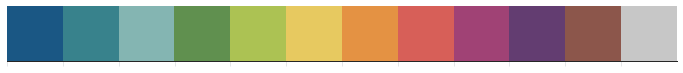

In [1471]:
# Define rainbow color palette for categories
rainbow = {
    'Authorization and enforcement': '#1A5784',
    'Contact tracing/Testing': '#38828C',
    'Emergency declarations': '#84B5B2',
    'Enabling and relief measures':'#60904F',
    'Face mask':'#ACC253',
    'Military mobilization':'#E7C960',
    'Social distancing':'#E49243',
    'Support for public health and clinical capacity':'#D75F58',
    'Travel restrictions':'#A04275',
    'Vaccinations':'#633D71'
}

colors = ['#1A5784', '#38828C', '#84B5B2', '#60904F', '#ACC253', '#E7C960', '#E49243', '#D75F58', '#A04275', '#633D71', '#8c564b', '#c7c7c7']
sns.palplot(sns.color_palette(colors))



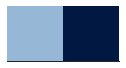

In [1618]:
# Define gradient color
# gradient = ['#84B5B2', '#1A5784']
gradient = ['#96B7D6', '#001842']
cm = LinearSegmentedColormap.from_list(
        "Custom", gradient, N=100)
sns.palplot(sns.color_palette(gradient))

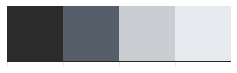

In [893]:
# Define chart color palette
chart = ['#2C2B2B','#565E69','#CACED3','#E7EAEE']
sns.palplot(sns.color_palette(chart))

In [1574]:
# Define constants
figure_size = (20,6)

# Define x-axis range
left = dt.date(2005, 1, 1)
right = dt.date(2023, 9, 1)

# Set background
sns.set_context('talk') #change the size from small to medium
sns.set_style('white') #change bg to white

# Add every font at the specified location
font_dir = ['/Users/haileyrobertson/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
# Set font family globally
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.weight'] = 'bold'

# Set margins
plt.rcParams['axes.xmargin'] = 0.9

# Define list of date formats
zfmts = ['', '%Y','%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']

# Format axes 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.titlepad'] = 30

# Format ticks
plt.rcParams["xtick.direction"] = "out"
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.color'] = chart[2]
plt.rcParams['xtick.major.width'] = 0.1
plt.rcParams['xtick.minor.width'] = 0.1
plt.rcParams['xtick.labelcolor'] = chart[1]
plt.rcParams['xtick.labelsize'] = 8

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.pad"] = -35
plt.rcParams["ytick.minor.pad"] = -35
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.size"] = 10
plt.rcParams["ytick.color"] = chart[2]
plt.rcParams["ytick.major.width"] = 0.1
plt.rcParams["ytick.minor.width"] = 0.1
plt.rcParams["ytick.labelcolor"] = chart[1]
plt.rcParams["ytick.labelsize"] = 8


# Adjust fontdict for title
titlefont = {'family': 'Open Sans',
             'color':  chart[0], 
             'weight': 400,
             'size': 20}

# Set grid style
plt.rcParams['grid.color'] = chart[2]
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth']=0.5

# Set legend style
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125



# Set axis labels
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelcolor'] = chart[1]

In [895]:
host = pd.read_csv("data/hpai_host_counts.csv")

In [896]:
host.head()

,t.name,count
0,"""Aves""",63788
1,"""Chroicocephalus ridibundus""",6196
2,"""Cygnus olor""",3936
3,"""Branta canadensis""",1751
4,"""Vulpes vulpes""",1385


In [897]:
# Function to remove the first and last characters from a string
def remove_first_and_last_chars(s):
    return s[1:-1]

In [898]:
host["t.name"] = host["t.name"].apply(remove_first_and_last_chars)

In [899]:
host.head()

,t.name,count
0,Aves,63788
1,Chroicocephalus ridibundus,6196
2,Cygnus olor,3936
3,Branta canadensis,1751
4,Vulpes vulpes,1385


In [900]:
outlier = host.iloc[1:]

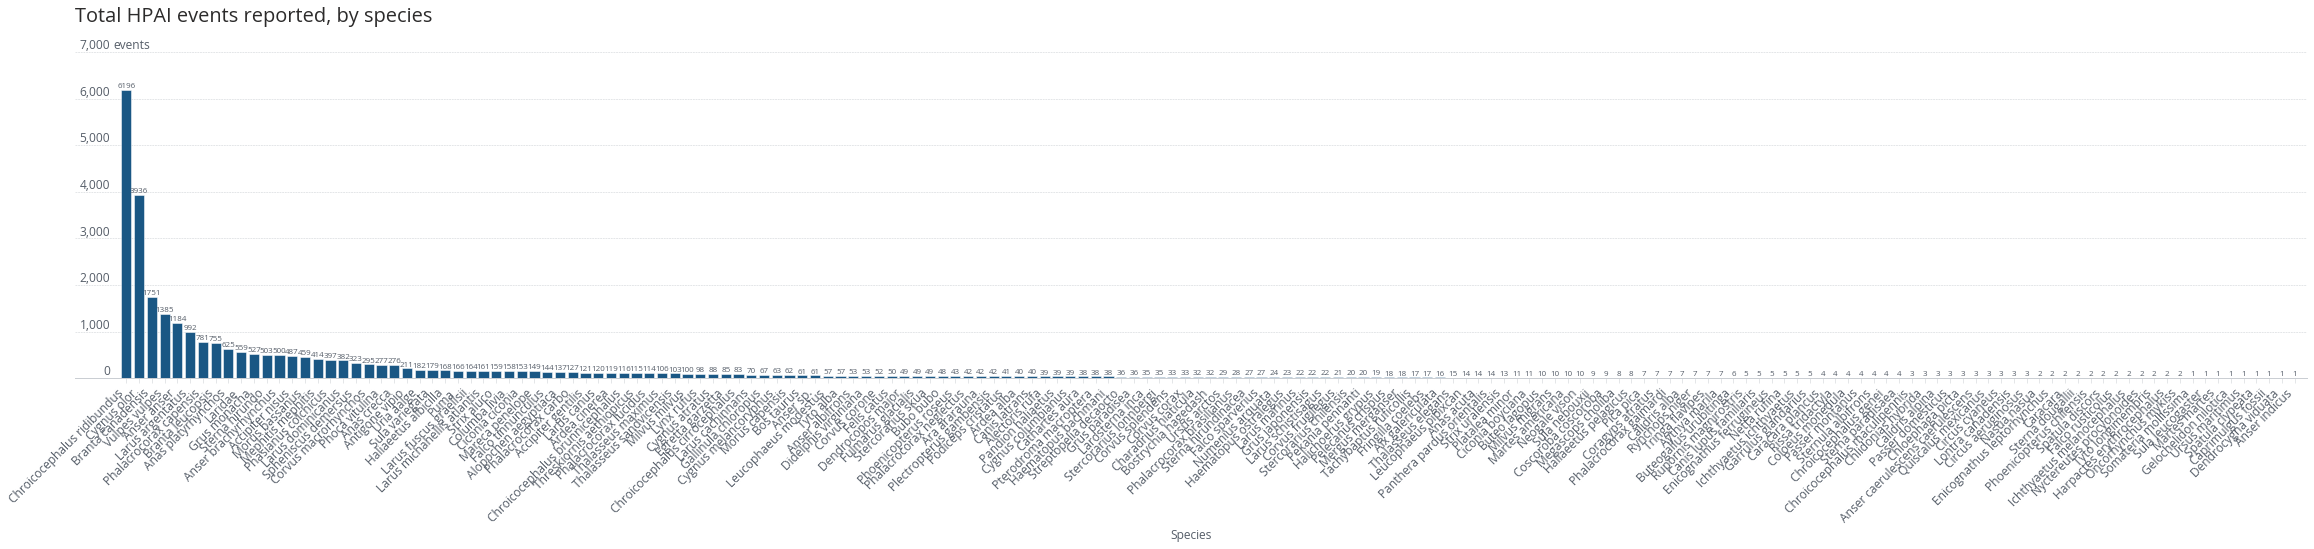

In [901]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size[0] * 2, figure_size[1]))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Plot bars with adjusted width and aligning at the center
bars = plt.bar(outlier['t.name'], outlier['count'], linewidth=0.5, width=0.8, align="center", color=colors[0]) 

# Set title
title = "Total HPAI events reported, by species"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("Species")

# Changes y-axis range
plt.gca().set_ybound(0, 7000)

# Format y-axis label
plt.ylabel("events", rotation=0, loc='top', labelpad=-75, color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# Format x-axis labels with rotation for better readability
plt.xticks(rotation=45, ha='right')

# Set x-axis limits to match the data range
plt.xlim(-4, len(host['t.name']) - 1)

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Add counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, '%d' % int(height), ha='center', va='bottom', fontsize=8, color=chart[1])

# plt.tight_layout()
plt.show()
# plt.savefig('figures/hpai_events_by_host.jpg', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait', bbox_inches='tight')

In [932]:
cases = pd.read_csv("data/hpai_cases_all_time.csv")
cases_2020 = pd.read_csv("data/hpai_cases_since_2020.csv")

In [925]:
cases["t.name"] = cases["t.name"].apply(remove_first_and_last_chars)
cases_2020["t.name"] = cases_2020["t.name"].apply(remove_first_and_last_chars)

In [926]:
exclude = cases.iloc[2:]
exclude_2020 = cases_2020.iloc[2:]

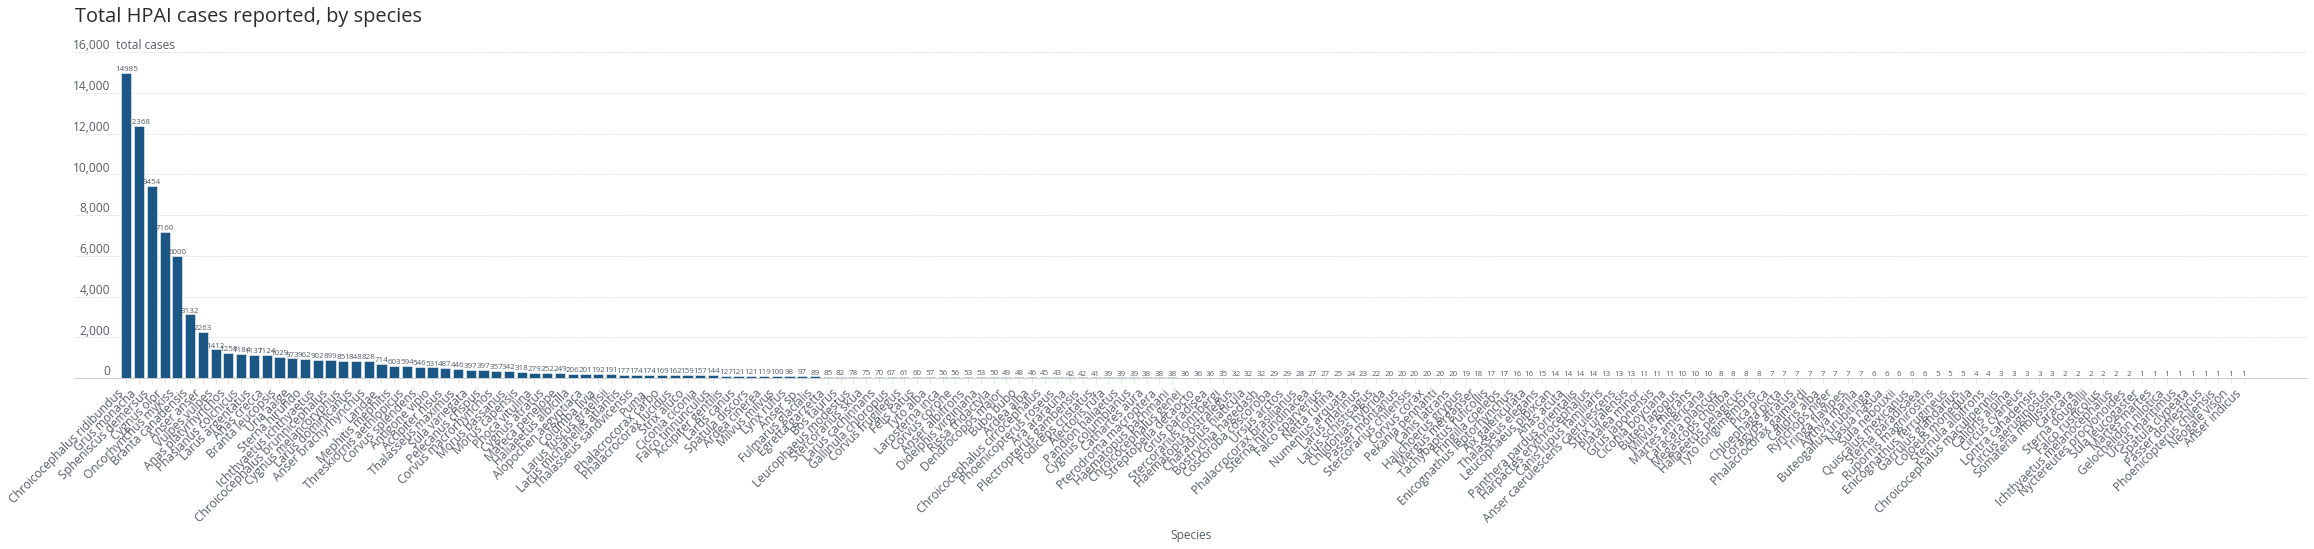

In [946]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size[0] * 2, figure_size[1]))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Plot bars with adjusted width and aligning at the center
bars = plt.bar(exclude['t.name'], exclude['totalCases'], linewidth=0.5, width=0.8, align="center", color=colors[0]) 

# Set title
title = "Total HPAI cases reported, by species"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("Species")

# Changes y-axis range
plt.gca().set_ybound(0, 16000)

# Format y-axis label
plt.ylabel("total cases", rotation=0, loc='top', labelpad=-102, color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# Format x-axis labels with rotation for better readability
plt.xticks(rotation=45, ha='right')

# Set x-axis limits to match the data range
plt.xlim(-4, len(host['t.name']) - 1)

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Add counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, '%d' % int(height), ha='center', va='bottom', fontsize=8, color=chart[1])

# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_cases_by_host_alltime.jpg', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

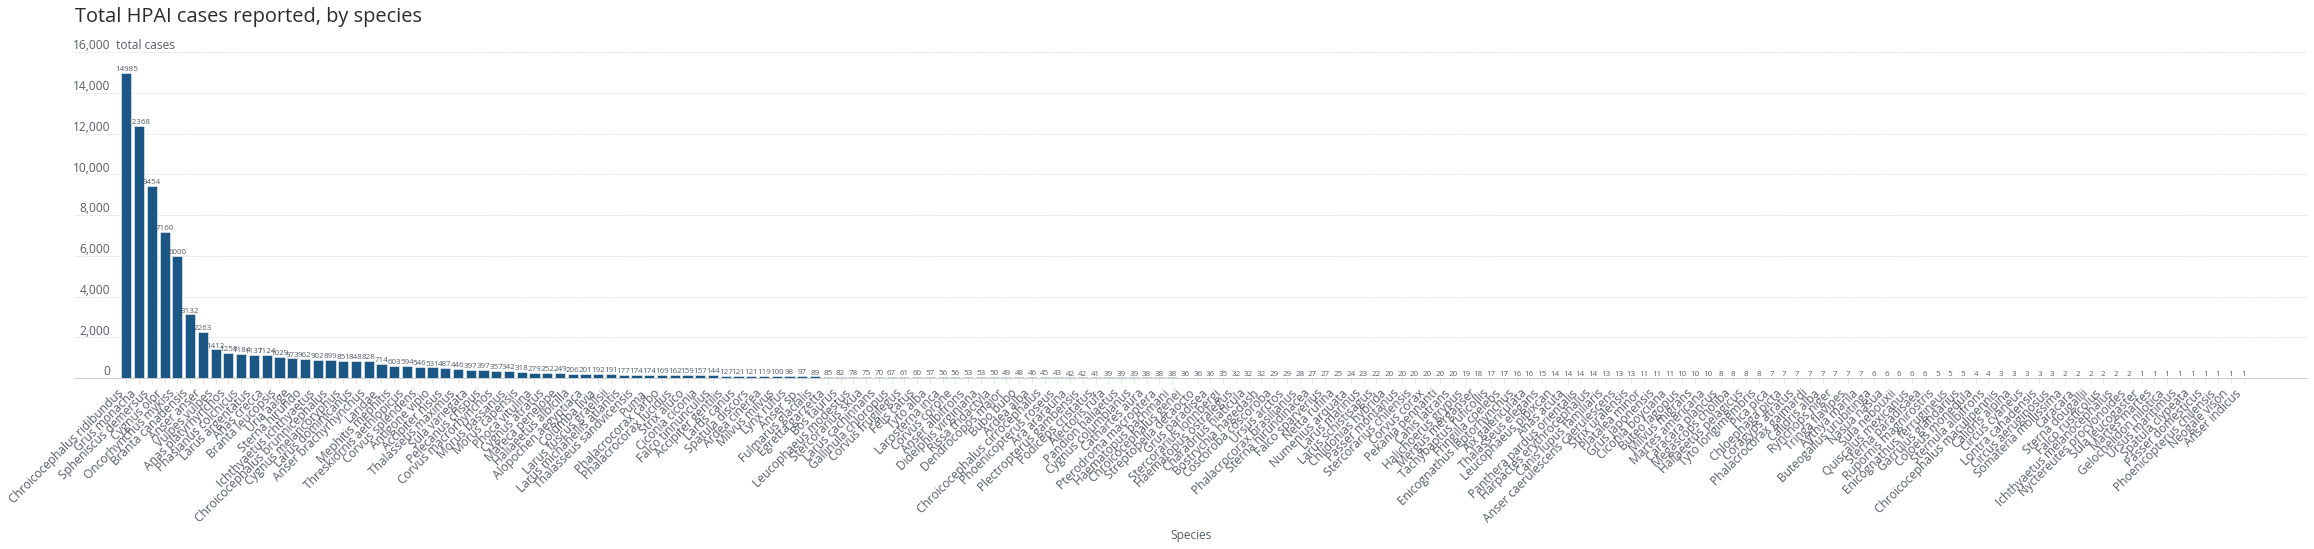

In [945]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size[0] * 2, figure_size[1]))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Plot bars with adjusted width and aligning at the center
bars = plt.bar(exclude['t.name'], exclude['totalCases'], linewidth=0.5, width=0.8, align="center", color=colors[0]) 

# Set title
title = "Total HPAI cases reported, by species"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("Species")

# Changes y-axis range
plt.gca().set_ybound(0, 16000)

# Format y-axis label
plt.ylabel("total cases", rotation=0, loc='top', labelpad=-102, color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# Format x-axis labels with rotation for better readability
plt.xticks(rotation=45, ha='right')

# Set x-axis limits to match the data range
plt.xlim(-4, len(host['t.name']) - 1)

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Add counts above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, '%d' % int(height), ha='center', va='bottom', fontsize=8, color=chart[1])

# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_cases_by_host_2020.jpg', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [1480]:
cases_ot = pd.read_csv("data/hpai_cases_month_10.csv")
r = pd.read_csv("data/hpai_reports_alltime_top10.csv")

In [1481]:
cases_ot.sort_values(by="monthlyCases")

,yearMonth,species,monthlyCases
27,"""2021-06""","""Cygnus olor""",1
22,"""2021-05""","""Larus argentatus""",1
129,"""2023-03""","""Anas platyrhynchos""",1
148,"""2023-07""","""Larus argentatus""",2
145,"""2023-06""","""Vulpes vulpes""",2
...,...,...,...
130,"""2023-04""","""Aves""",3507170
78,"""2022-10""","""Aves""",6497019
98,"""2022-12""","""Aves""",9340939
87,"""2022-11""","""Aves""",10032905


In [1482]:
cases_ot["yearMonth"] = cases_ot["yearMonth"].apply(remove_first_and_last_chars)
r["yearMonth"] = r["yearMonth"].apply(remove_first_and_last_chars)

In [1483]:
# Assuming you have the DataFrame as df
# Convert yearMonth to a date
# Convert yearMonth to a date
cases_ot['yearMonth'] = pd.to_datetime(cases_ot['yearMonth'], format="%Y-%m")
r['yearMonth'] = pd.to_datetime(r['yearMonth'], format="%Y-%m")


# Convert monthlyCases to an integer
cases_ot['monthlyCases'] = cases_ot['monthlyCases'].astype(int)
r['monthlyCases'] = r['monthlyReports'].astype(int)


# Remove quotation marks from species
cases_ot['species'] = cases_ot['species'].str.strip('"')
r['species'] = r['species'].str.strip('"')

In [1484]:
# Convert yearMonth to a date
cases_ot['yearMonth'] = pd.to_datetime(cases_ot['yearMonth'], format='%Y-%m-%d')
r['yearMonth'] = pd.to_datetime(r['yearMonth'], format='%Y-%m-%d')

In [1485]:
# Filter out rows with specific species names (e.g., 'Aves', 'Phalacrocorax capensis')
species_to_exclude = ['Aves','Phalacrocorax capensis']
cases_ot = cases_ot[~cases_ot['species'].isin(species_to_exclude)]

In [1486]:
# Pivot the DataFrame with species as columns
pt = cases_ot.pivot_table(index='yearMonth', columns='species', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
pt.reset_index(inplace=True)

# Set 'yearMonth' as the index again
pt.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
pt = pt.asfreq('MS',fill_value=0).reset_index()




# Pivot the DataFrame with species as columns
rt = r.pivot_table(index='yearMonth', columns='species', values='monthlyReports', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
rt.reset_index(inplace=True)

# Set 'yearMonth' as the index again
rt.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
rt = rt.asfreq('MS',fill_value=0).reset_index()

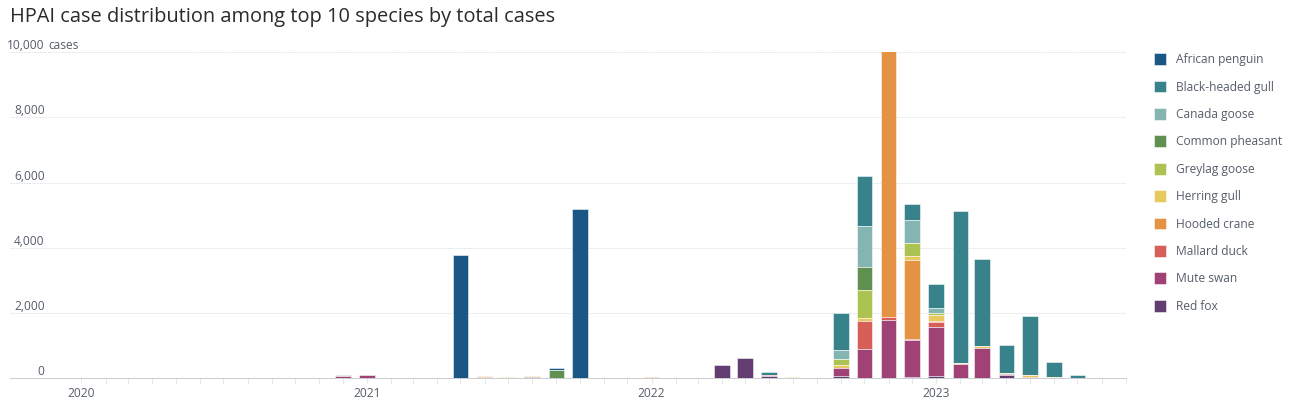

In [384]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pt['yearMonth']
y1=pt['Spheniscus demersus']
y2=pt['Chroicocephalus ridibundus']
y3=pt['Branta canadensis']
y4=pt['Phasianus colchicus']
y5=pt['Anser anser']
y6=pt['Larus argentatus']
y7=pt['Grus monacha']
y8=pt['Anas platyrhynchos']
y9= pt['Cygnus olor']
y10 = pt['Vulpes vulpes']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='African penguin') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Black-headed gull')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Canada goose')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Common pheasant')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Greylag goose')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='Herring gull')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Hooded crane')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[7], label='Mallard duck')
plt.bar(x, y9, bottom=y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Mute swan')
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Red fox')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,10000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among top 10 species by total cases"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("cases", rotation=0,loc='top',labelpad=-72,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.15,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
plt.show()
# plt.savefig('figures/hpai_cases_month_10.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [1487]:
rt.head()

species,yearMonth,Anser anser,Aves,Branta canadensis,Branta leucopsis,Chroicocephalus ridibundus,Cygnus olor,Larus argentatus,Morus bassanus,Sterna hirundo,Vulpes vulpes
0,2005-07-01,0,9,0,0,0,0,0,0,0,0
1,2005-08-01,0,1,0,0,0,0,0,0,0,0
2,2005-09-01,0,1,0,0,0,0,0,0,0,0
3,2005-10-01,0,32,0,0,0,0,0,0,0,0
4,2005-11-01,0,51,0,0,0,0,0,0,0,0


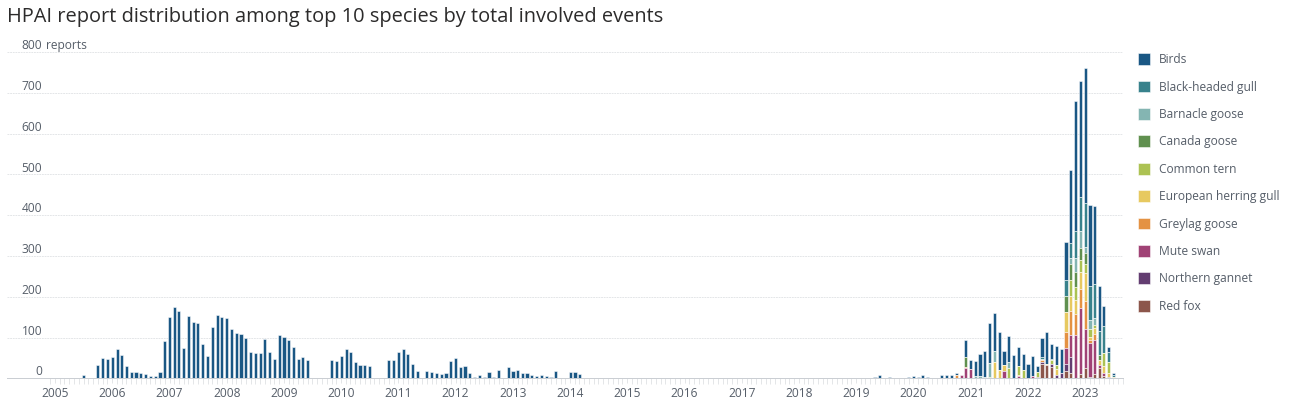

In [1493]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=rt['yearMonth']
y1=rt['Aves']
y2=rt['Chroicocephalus ridibundus']
y3=rt['Branta leucopsis']
y4=rt['Branta canadensis']
y5=rt['Sterna hirundo']
y6=rt['Larus argentatus']
y7=rt['Anser anser']
y8= rt['Cygnus olor']
y9 = rt['Morus bassanus']
y10 =rt['Vulpes vulpes']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='Birds') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Black-headed gull')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Barnacle goose')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Canada goose')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Common tern')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='European herring gull')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Greylag goose')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Mute swan')
plt.bar(x, y9, bottom=y10, linewidth=0.5, width=20, align="center", color=colors[9], label='Northern gannet')
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[10], label='Red fox')


ax.xaxis_date()

# Define x-axis range
left = dt.date(2004, 3, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,800)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI report distribution among top 10 species by total involved events"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:9]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("reports", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.15,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_reports_month_10.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

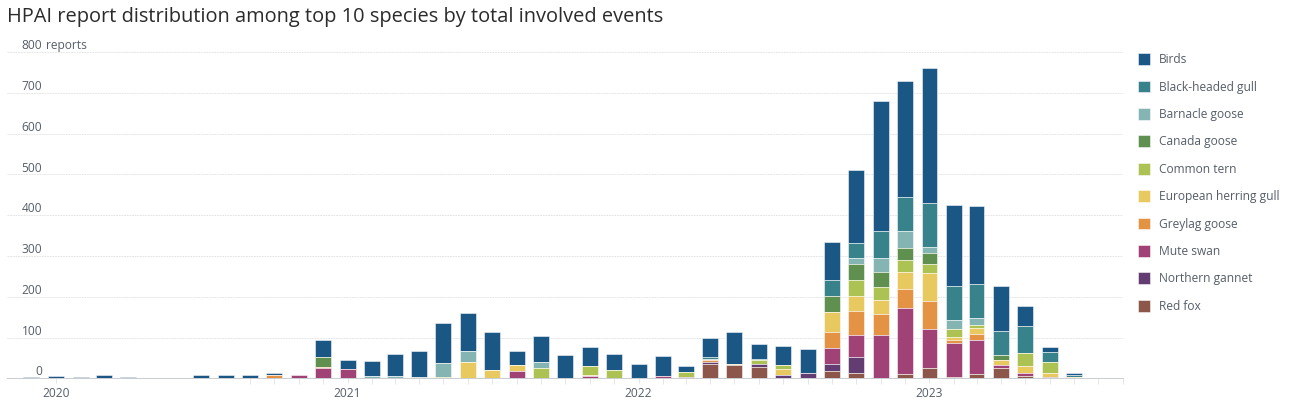

In [1497]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=rt['yearMonth']
y1=rt['Aves']
y2=rt['Chroicocephalus ridibundus']
y3=rt['Branta leucopsis']
y4=rt['Branta canadensis']
y5=rt['Sterna hirundo']
y6=rt['Larus argentatus']
y7=rt['Anser anser']
y8= rt['Cygnus olor']
y9 = rt['Morus bassanus']
y10 =rt['Vulpes vulpes']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='Birds') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Black-headed gull')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Barnacle goose')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Canada goose')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Common tern')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='European herring gull')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Greylag goose')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Mute swan')
plt.bar(x, y9, bottom=y10, linewidth=0.5, width=20, align="center", color=colors[9], label='Northern gannet')
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[10], label='Red fox')


ax.xaxis_date()

# Define x-axis range
left = dt.date(2019, 11, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,800)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI report distribution among top 10 species by total involved events"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:9]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("reports", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.15,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
plt.show()
# plt.savefig('figures/hpai_reports_month_10_2020.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [443]:
cl = pd.read_csv('data/hpai_cases_month_all.csv')

In [451]:
cl.sort_values(by=['taxonomicClasses','species'])

,yearMonth,species,taxonomicClasses,monthlyCases
17,2007-01-01,Oncorhynchus mykiss,Actinopteri,1014000
188,2021-08-01,Accipiter gentilis,Aves,3042
207,2021-10-01,Accipiter gentilis,Aves,3042
213,2021-11-01,Accipiter gentilis,Aves,1014
222,2021-12-01,Accipiter gentilis,Aves,507
...,...,...,...,...
525,2023-02-01,Vulpes vulpes,Mammalia,1690
554,2023-03-01,Vulpes vulpes,Mammalia,4056
584,2023-04-01,Vulpes vulpes,Mammalia,19266
613,2023-05-01,Vulpes vulpes,Mammalia,2197


In [445]:
cl["yearMonth"] = cl["yearMonth"].apply(remove_first_and_last_chars)

In [446]:
cl['yearMonth'] = pd.to_datetime(cl['yearMonth'], format="%Y-%m")

# Convert monthlyCases to an integer
cl['monthlyCases'] = cl['monthlyCases'].astype(int)

# Remove quotation marks from species
cl['species'] = cl['species'].str.strip('"')
cl["taxonomicClasses"] = cl["taxonomicClasses"].apply(remove_first_and_last_chars)
cl['taxonomicClasses'] = cl['taxonomicClasses'].str.strip('"')

In [447]:
# Convert yearMonth to a date
cl['yearMonth'] = pd.to_datetime(cl['yearMonth'], format='%Y-%m-%d')

In [450]:
# Custom function to fill taxonomicClasses with species name if it's 'Aves'
def fill_tax_class(row):
    if row['species'] == 'Aves':
        return 'Aves'
    return row['taxonomicClasses']

# Apply the custom function to fill the taxonomicClasses column
cl['taxonomicClasses'] = cl.apply(fill_tax_class, axis=1)

In [452]:
# Pivot the DataFrame with species as columns
cla = cl.pivot_table(index='yearMonth', columns='taxonomicClasses', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
cla.reset_index(inplace=True)

# Set 'yearMonth' as the index again
cla.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
cla = cla.asfreq('MS',fill_value=0).reset_index()

In [453]:
cla.sort_values(by='yearMonth')

taxonomicClasses,yearMonth,Actinopteri,Aves,Mammalia
0,2005-07-01,0,691717,0
1,2005-08-01,0,4987697,0
2,2005-09-01,0,7436,0
3,2005-10-01,0,4036734,0
4,2005-11-01,0,7715526,0
...,...,...,...,...
212,2023-03-01,0,253553404,28054
213,2023-04-01,0,592909629,24674
214,2023-05-01,0,58263764,3380
215,2023-06-01,0,51335440,338


In [908]:
cla_2020 = cla.loc[cla['yearMonth'] >= '2020-01-01'].reset_index(drop=True)

In [915]:
cla_2007 = cla.loc[cla['yearMonth'] >= '2007-01-01'].reset_index(drop=True)

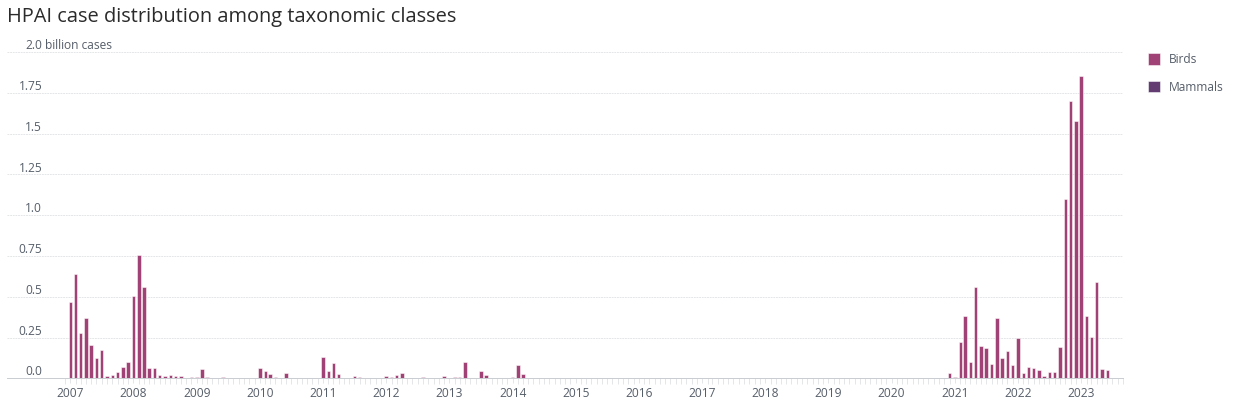

In [922]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = cla_2007['yearMonth']
y1 = cla_2007['Aves']
y2 = cla_2007['Mammalia']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2, linewidth=0.5,width=20, align="center", color=colors[8], label='Birds')
plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Mammals')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,2000000000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among taxonomic classes"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:10]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("billion cases", rotation=0,loc='top',labelpad=-105,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# Custom label formatter for y-axis
def billions_formatter(x, pos):
    return float(x/1e9)

# Apply the custom label formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# # after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_cases_class_2007.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

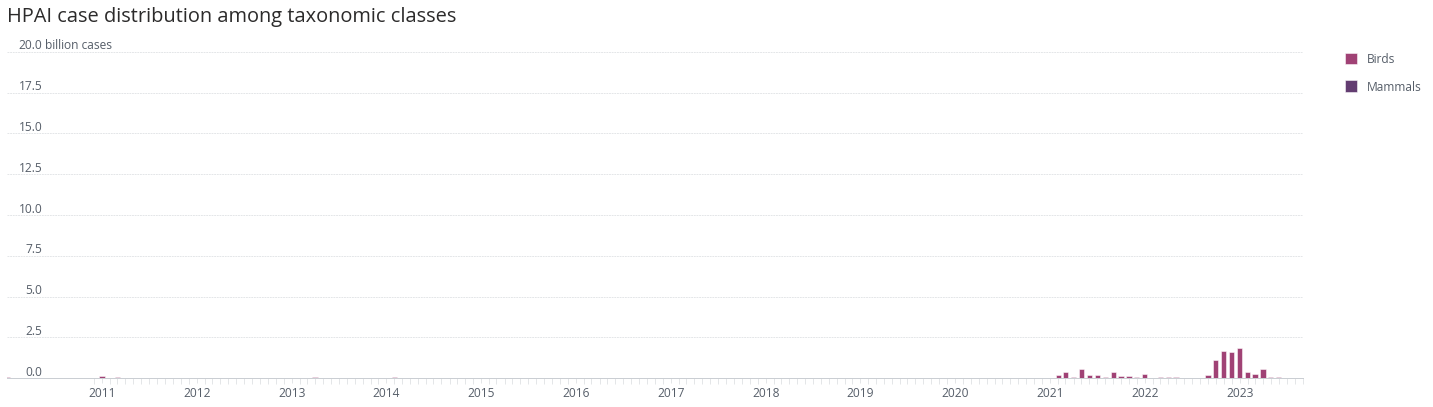

In [506]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = cla['yearMonth']
y1 = cla['Aves']
y2 = cla['Mammalia']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2, linewidth=0.5,width=20, align="center", color=colors[8], label='Birds')
plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Mammals')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,20000000000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among taxonomic classes"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:10]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("billion cases", rotation=0,loc='top',labelpad=-105,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# Custom label formatter for y-axis
def billions_formatter(x, pos):
    return float(x/1e9)

# Apply the custom label formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# # after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
plt.show()
# plt.savefig('figures/hpai_cases_class_all.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [949]:
# Filter out rows with specific species names (e.g., 'Aves', 'Phalacrocorax capensis')
classes_to_exclude = ['Aves']
new = cl[~cl['taxonomicClasses'].isin(classes_to_exclude)]

In [950]:
# Pivot the DataFrame with species as columns
new = new.pivot_table(index='yearMonth', columns='taxonomicClasses', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
new.reset_index(inplace=True)

# Set 'yearMonth' as the index again
new.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
new = new.asfreq('MS',fill_value=0).reset_index()

In [951]:
new_2020 = cla.loc[cla['yearMonth'] >= '2020-01-01'].reset_index(drop=True)

In [952]:
new_2020.head()

taxonomicClasses,yearMonth,Actinopteri,Aves,Mammalia
0,2020-01-01,0,1562236,0
1,2020-02-01,0,2819427,0
2,2020-03-01,0,1399151,0
3,2020-04-01,0,1037660,0
4,2020-05-01,0,0,0


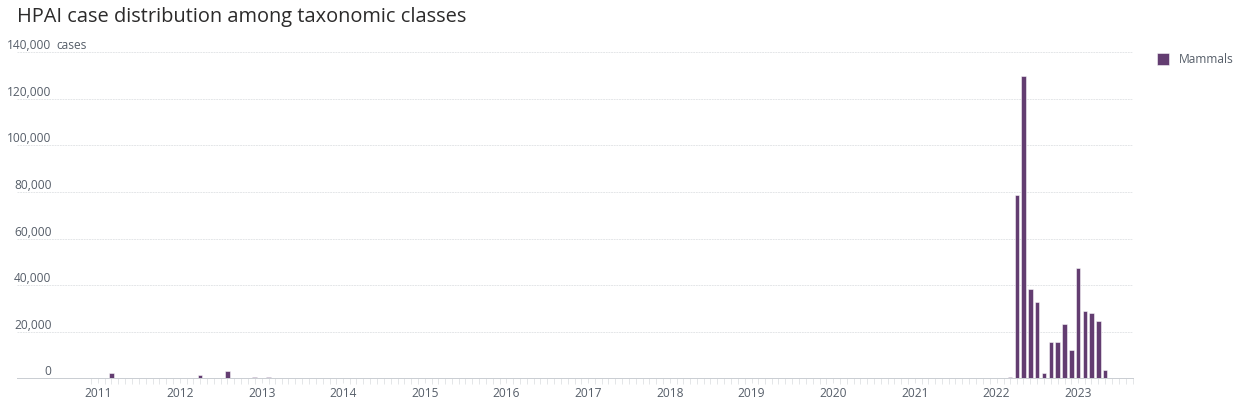

In [518]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = new['yearMonth']
y2 = new['Mammalia']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Mammals')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,140000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among taxonomic classes"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:10]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("cases", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# # Custom label formatter for y-axis
# def billions_formatter(x, pos):
#     return float(x/1e9)

# # Apply the custom label formatter to y-axis
# ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


plt.tight_layout()
plt.show()
# plt.savefig('figures/hpai_cases_mammals_all.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

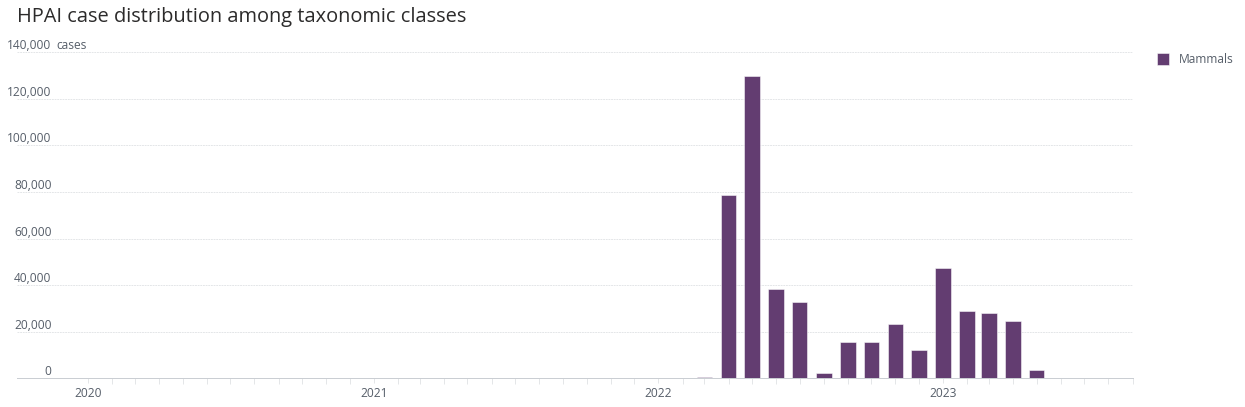

In [958]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = new_2020['yearMonth']
y2 = new_2020['Mammalia']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Mammals')

ax.xaxis_date()

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,140000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among taxonomic classes"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("cases", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# # Custom label formatter for y-axis
# def billions_formatter(x, pos):
#     return float(x/1e9)

# # Apply the custom label formatter to y-axis
# ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
# plt.savefig('figures/hpai_cases_mammals_2020.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [965]:
order = pd.read_csv('data/hpai_cases_order_all_time.csv')

In [977]:
order["yearMonth"] = order["yearMonth"].apply(remove_first_and_last_chars)

In [978]:
# Custom function to convert date string to zero-padded month
from datetime import datetime
def convert_to_zero_padded_month(date_string):
    parsed_date = datetime.strptime(date_string, "%Y-%m")
    return parsed_date.strftime("%Y-%m")

# Apply the custom function to the "yearMonth" column and create a new column "yearMonth0"
order["yearMonth"] = order["yearMonth"].apply(convert_to_zero_padded_month)


In [979]:
order['yearMonth'] = pd.to_datetime(order['yearMonth'], format="%Y-%m")

# Convert monthlyCases to an integer
order['monthlyCases'] = order['monthlyCases'].astype(int)

# Remove quotation marks from species
order['species'] = order['species'].str.strip('"')
order["taxonomicOrder"] = order["taxonomicOrder"].apply(remove_first_and_last_chars)

# Convert yearMonth to a date
order['yearMonth'] = pd.to_datetime(order['yearMonth'], format='%Y-%m-%d')

In [986]:
# Pivot the DataFrame with species as columns
piv = order.pivot_table(index='yearMonth', columns='taxonomicOrder', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
piv.reset_index(inplace=True)

# Set 'yearMonth' as the index again
piv.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
piv = piv.asfreq('MS',fill_value=0).reset_index()

In [992]:
uq = order["taxonomicOrder"].unique()
print(sorted(uq))

['Accipitriformes', 'Anseriformes', 'Artiodactyla', 'Carnivora', 'Charadriiformes', 'Ciconiiformes', 'Columbiformes', 'Didelphimorphia', 'Falconiformes', 'Galliformes', 'Gruiformes', 'Passeriformes', 'Pelecaniformes', 'Phoenicopteriformes', 'Piciformes', 'Podicipediformes', 'Procellariiformes', 'Psittaciformes', 'Salmoniformes', 'Sphenisciformes', 'Strigiformes', 'Trogoniformes']


In [1041]:
piv_2022 = piv.loc[piv['yearMonth'] >= '2022-01-01'].reset_index(drop=True)

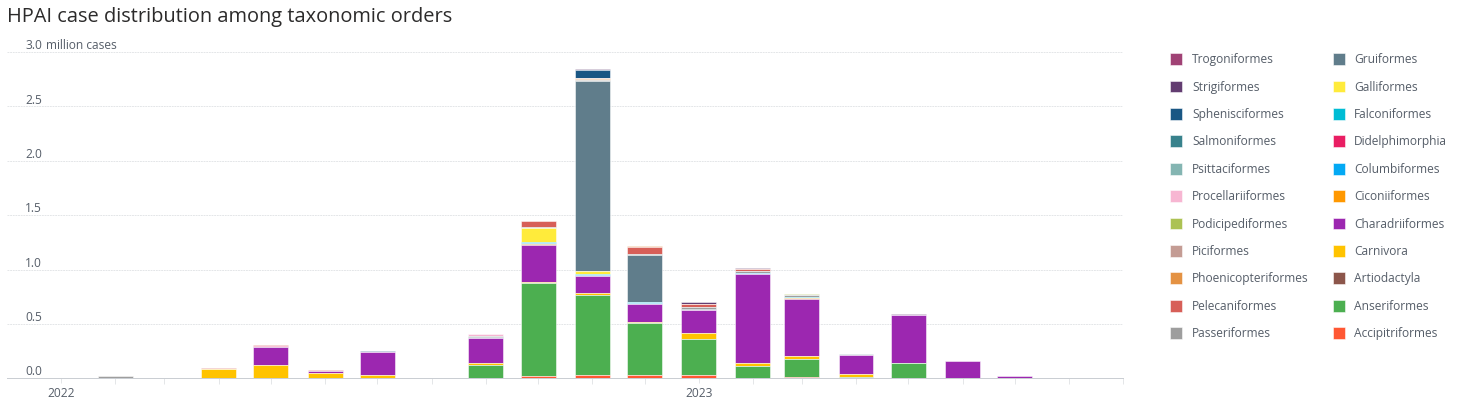

In [1046]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = piv_2022['yearMonth']
y1 = piv_2022['Accipitriformes']
y2 = piv_2022['Anseriformes']
y3 = piv_2022['Artiodactyla']
y4 = piv_2022['Carnivora']
y5 = piv_2022['Charadriiformes']
y6 = piv_2022['Ciconiiformes']
y7 = piv_2022['Columbiformes']
y8 = piv_2022['Didelphimorphia']
y9 = piv_2022['Falconiformes']
y10 = piv_2022['Galliformes']
y11 = piv_2022['Gruiformes']
y12 = piv_2022['Passeriformes']
y13 = piv_2022['Pelecaniformes']
y14 = piv_2022['Phoenicopteriformes']
y15 = piv_2022['Piciformes']
y16 = piv_2022['Podicipediformes']
y17 = piv_2022['Procellariiformes']
y18 = piv_2022['Psittaciformes']
y19 = piv_2022['Salmoniformes']
y20 = piv_2022['Sphenisciformes']
y21 = piv_2022['Strigiformes']
y22 = piv_2022['Trogoniformes']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
plt.bar(x, y22, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17+y18+y19+y20+y21, linewidth=0.5,width=20, align="center", color=colors[8], label='Trogoniformes')
plt.bar(x, y21, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17+y18+y19+y20, linewidth=0.5,width=20, align="center", color=colors[9], label='Strigiformes')
plt.bar(x, y20, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17+y18+y19, linewidth=0.5,width=20, align="center", color=colors[0], label='Sphenisciformes')
plt.bar(x, y19, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17+y18, linewidth=0.5,width=20, align="center", color=colors[1], label='Salmoniformes')
plt.bar(x, y18, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17, linewidth=0.5,width=20, align="center", color=colors[2], label='Psittaciformes')
plt.bar(x, y17, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16, linewidth=0.5,width=20, align="center", color="#f7b6d2", label='Procellariiformes')
plt.bar(x, y16, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15, linewidth=0.5,width=20, align="center", color=colors[4], label='Podicipediformes')
plt.bar(x, y15, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14, linewidth=0.5,width=20, align="center", color="#c49c94", label='Piciformes')
plt.bar(x, y14, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13, linewidth=0.5,width=20, align="center", color=colors[6], label='Phoenicopteriformes')
plt.bar(x, y13, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12, linewidth=0.5,width=20, align="center", color=colors[7], label='Pelecaniformes')
plt.bar(x, y12, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11, linewidth=0.5,width=20, align="center", color="#9E9E9E", label='Passeriformes')
plt.bar(x, y11, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color="#607D8B", label='Gruiformes')
plt.bar(x, y10, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9, linewidth=0.5,width=20, align="center", color="#FFEB3B", label='Galliformes')
plt.bar(x, y9, bottom=y1+y2+y3+y4+y5+y6+y7+y8, linewidth=0.5,width=20, align="center", color="#00BCD4", label='Falconiformes')
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, linewidth=0.5,width=20, align="center", color="#E91E63", label='Didelphimorphia')
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, linewidth=0.5,width=20, align="center", color="#03A9F4", label='Columbiformes')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, linewidth=0.5,width=20, align="center", color="#FF9800", label='Ciconiiformes')
plt.bar(x, y5, bottom=y1+y2+y3+y4, linewidth=0.5,width=20, align="center", color="#9C27B0", label='Charadriiformes')
plt.bar(x, y4, bottom=y1+y2+y3, linewidth=0.5,width=20, align="center", color="#FFC300", label='Carnivora')
plt.bar(x, y3, bottom=y1+y2, linewidth=0.5,width=20, align="center", color="#8c564b", label='Artiodactyla')
plt.bar(x, y2, bottom=y1, linewidth=0.5,width=20, align="center", color="#4CAF50", label='Anseriformes')
plt.bar(x, y1, bottom=0, linewidth=0.5, width=20, align="center", color="#FF5733", label='Accipitriformes')

ax.xaxis_date()

# Define x-axis range
left = dt.date(2021, 12, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,3000000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among taxonomic orders"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:1]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("million cases", rotation=0,loc='top',labelpad=-110,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# Custom label formatter for y-axis
def millions_formatter(x, pos):
    return float(x/1e6)

# Apply the custom label formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# # after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.30,1.03),labelcolor=chart[1],labelspacing=1.2, ncol = 2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_cases_order_2022.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

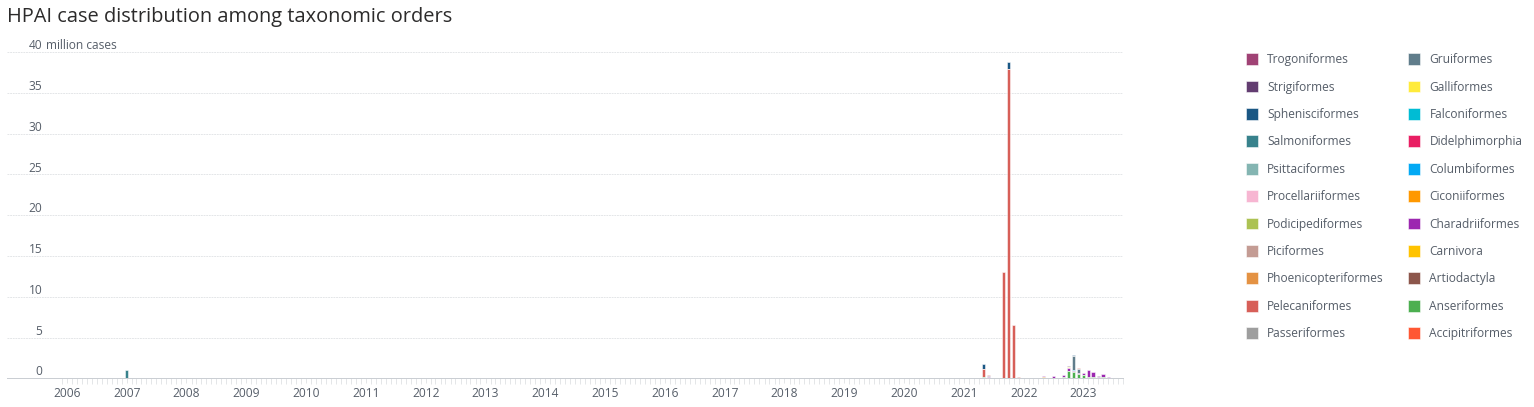

In [1032]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = piv['yearMonth']
y1 = piv['Accipitriformes']
y2 = piv['Anseriformes']
y3 = piv['Artiodactyla']
y4 = piv['Carnivora']
y5 = piv['Charadriiformes']
y6 = piv['Ciconiiformes']
y7 = piv['Columbiformes']
y8 = piv['Didelphimorphia']
y9 = piv['Falconiformes']
y10 = piv['Galliformes']
y11 = piv['Gruiformes']
y12 = piv['Passeriformes']
y13 = piv['Pelecaniformes']
y14 = piv['Phoenicopteriformes']
y15 = piv['Piciformes']
y16 = piv['Podicipediformes']
y17 = piv['Procellariiformes']
y18 = piv['Psittaciformes']
y19 = piv['Salmoniformes']
y20 = piv['Sphenisciformes']
y21 = piv['Strigiformes']
y22 = piv['Trogoniformes']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
plt.bar(x, y22, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17+y18+y19+y20+y21, linewidth=0.5,width=20, align="center", color=colors[8], label='Trogoniformes')
plt.bar(x, y21, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17+y18+y19+y20, linewidth=0.5,width=20, align="center", color=colors[9], label='Strigiformes')
plt.bar(x, y20, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17+y18+y19, linewidth=0.5,width=20, align="center", color=colors[0], label='Sphenisciformes')
plt.bar(x, y19, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17+y18, linewidth=0.5,width=20, align="center", color=colors[1], label='Salmoniformes')
plt.bar(x, y18, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16+y17, linewidth=0.5,width=20, align="center", color=colors[2], label='Psittaciformes')
plt.bar(x, y17, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15+y16, linewidth=0.5,width=20, align="center", color="#f7b6d2", label='Procellariiformes')
plt.bar(x, y16, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14+y15, linewidth=0.5,width=20, align="center", color=colors[4], label='Podicipediformes')
plt.bar(x, y15, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13+y14, linewidth=0.5,width=20, align="center", color="#c49c94", label='Piciformes')
plt.bar(x, y14, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12+y13, linewidth=0.5,width=20, align="center", color=colors[6], label='Phoenicopteriformes')
plt.bar(x, y13, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12, linewidth=0.5,width=20, align="center", color=colors[7], label='Pelecaniformes')
plt.bar(x, y12, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11, linewidth=0.5,width=20, align="center", color="#9E9E9E", label='Passeriformes')
plt.bar(x, y11, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color="#607D8B", label='Gruiformes')
plt.bar(x, y10, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9, linewidth=0.5,width=20, align="center", color="#FFEB3B", label='Galliformes')
plt.bar(x, y9, bottom=y1+y2+y3+y4+y5+y6+y7+y8, linewidth=0.5,width=20, align="center", color="#00BCD4", label='Falconiformes')
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, linewidth=0.5,width=20, align="center", color="#E91E63", label='Didelphimorphia')
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, linewidth=0.5,width=20, align="center", color="#03A9F4", label='Columbiformes')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, linewidth=0.5,width=20, align="center", color="#FF9800", label='Ciconiiformes')
plt.bar(x, y5, bottom=y1+y2+y3+y4, linewidth=0.5,width=20, align="center", color="#9C27B0", label='Charadriiformes')
plt.bar(x, y4, bottom=y1+y2+y3, linewidth=0.5,width=20, align="center", color="#FFC300", label='Carnivora')
plt.bar(x, y3, bottom=y1+y2, linewidth=0.5,width=20, align="center", color="#8c564b", label='Artiodactyla')
plt.bar(x, y2, bottom=y1, linewidth=0.5,width=20, align="center", color="#4CAF50", label='Anseriformes')
plt.bar(x, y1, bottom=0, linewidth=0.5, width=20, align="center", color="#FF5733", label='Accipitriformes')
ax.xaxis_date()


# Define x-axis range
left = dt.date(2005, 1, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,40000000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among taxonomic orders"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:10]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("million cases", rotation=0,loc='top',labelpad=-110,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# Custom label formatter for y-axis
def millions_formatter(x, pos):
    return int(x/1e6)

# Apply the custom label formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# # after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2, ncol = 2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_cases_order_all.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [2350]:
# human = pd.read_csv("data/flunet_2020_total.csv")
# humans = pd.read_csv("data/flunet_alltime.csv")
# animals = pd.read_csv("data/wahis_2020.csv")
# animal = pd.read_csv("data/wahis_alltime.csv")

flunet = pd.read_csv("data/flunet_past_year.csv")
wahis = pd.read_csv("data/wahis_past_year.csv")

# full = pd.concat([human, animals], ignore_index=True)
# fulls = pd.concat([humans,animal], ignore_index = True)
fw = pd.concat([flunet,wahis], ignore_index=True)

In [2351]:
# full["iso3"] = full["iso3"].apply(remove_first_and_last_chars)
# full["species"] = full["species"].apply(remove_first_and_last_chars)
# full['flua']=full['flua'].apply(remove_first_and_last_chars)

# fulls["iso3"] = fulls["iso3"].apply(remove_first_and_last_chars)
# fulls["species"] = fulls["species"].apply(remove_first_and_last_chars)
# fulls['flua']=fulls['flua'].apply(remove_first_and_last_chars)

fw["iso3"] = fw["iso3"].apply(remove_first_and_last_chars)
fw["species"] = fw["species"].apply(remove_first_and_last_chars)
fw['flua']=fw['flua'].apply(remove_first_and_last_chars)

In [2352]:
# # Use conditional logic to create separate columns for 'Homo sapiens' and aggregate for other species
# merged = full.pivot_table(index=['iso3'], columns=full['species'].eq('Homo sapiens'), values='fluCases', aggfunc='sum').reset_index()

# # Rename the columns
# merged.rename(columns={True: 'Human cases', False: 'Non-human cases'}, inplace=True)

# # Fill NaN values (no 'Homo sapiens' cases for a specific iso3) with 0
# merged.fillna(0, inplace=True)

# # Convert float columns to integers (optional, if you want the values to be integers)
# merged = merged.astype({'Human cases': int, 'Non-human cases': int})


# # Use conditional logic to create separate columns for 'Homo sapiens' and aggregate for other species
# merg = fulls.pivot_table(index=['iso3'], columns=fulls['species'].eq('Homo sapiens'), values='fluCases', aggfunc='sum').reset_index()

# # Rename the columns
# merg.rename(columns={True: 'Human cases', False: 'Non-human cases'}, inplace=True)

# # Fill NaN values (no 'Homo sapiens' cases for a specific iso3) with 0
# merg.fillna(0, inplace=True)

# # Convert float columns to integers (optional, if you want the values to be integers)
# merg = merg.astype({'Human cases': int, 'Non-human cases': int})

# Use conditional logic to create separate columns for 'Homo sapiens' and aggregate for other species
fws = fw.pivot_table(index=['iso3'], columns=fw['species'].eq('Homo sapiens'), values='fluCases', aggfunc='sum').reset_index()

# Rename the columns
fws.rename(columns={True: 'Human cases', False: 'Non-human cases'}, inplace=True)

# Fill NaN values (no 'Homo sapiens' cases for a specific iso3) with 0
fws.fillna(0, inplace=True)

# Convert float columns to integers (optional, if you want the values to be integers)
fws = fws.astype({'Human cases': int, 'Non-human cases': int})


In [2355]:
# merged["Non-human cases"] = merged["nonHuman_normalized"].fillna(0)
# merged["Human cases"] = merged["Human_normalized"].fillna(0)

# merg["Non-human cases"] = merg["Non-human cases"].fillna(0)
# merg["Human cases"] = merg["Human cases"].fillna(0)

fws["Non-human cases"] = fws["Non-human cases"].fillna(0)
fws["Human cases"] = fws["Human cases"].fillna(0)

In [2356]:
# # Normalize 'humans' and 'animals' attributes to [0, 1] range for consistent colors.
# merged['Human_normalized'] = (merged['Human cases'] - merged['Human cases'].min()) / (merged['Human cases'].max() - merged['Human cases'].min())
# merged['nonHuman_normalized'] = (merged['Non-human cases'] - merged['Non-human cases'].min()) / (merged['Non-human cases'].max() - merged['Non-human cases'].min())

# # Normalize 'humans' and 'animals' attributes to [0, 1] range for consistent colors.
# merg['Human_normalized'] = (merg['Human cases'] - merg['Human cases'].min()) / (merg['Human cases'].max() - merg['Human cases'].min())
# merg['nonHuman_normalized'] = (merg['Non-human cases'] - merg['Non-human cases'].min()) / (merg['Non-human cases'].max() - merg['Non-human cases'].min())

# Normalize 'humans' and 'animals' attributes to [0, 1] range for consistent colors.
fws['Human_normalized'] = (fws['Human cases'] - fws['Human cases'].min()) / (fws['Human cases'].max() - fws['Human cases'].min())
fws['nonHuman_normalized'] = (fws['Non-human cases'] - fws['Non-human cases'].min()) / (fws['Non-human cases'].max() - fws['Non-human cases'].min())

In [2369]:
# # Define the bins
# bins = 3

# # Bin the first variable - x
# merged['Human'] = pd.qcut(merged['Human_normalized'], q=bins, labels=False, duplicates="drop")
# merged['Human'] = merged['Human'].astype('str')

# # Bin the second variable - y
# merged['Non-human'] = pd.qcut(merged['nonHuman_normalized'], q=bins, labels=False,duplicates="drop")
# merged['Non-human'] = merged['Non-human'].astype('str')



# # Define the bins
# bins = 3

# # Bin the first variable - x
# merg['Human'] = pd.qcut(merg['Human_normalized'], q=bins, labels=False, duplicates="drop")
# merg['Human'] = merg['Human'].astype('str')

# # Bin the second variable - y
# merg['Non-human'] = pd.qcut(merg['nonHuman_normalized'], q=bins, labels=False, duplicates="drop")
# merg['Non-human'] = merg['Non-human'].astype('str')




# Define the bins
bins = 3

# Bin the first variable - x
fws['Human'] = pd.qcut(fws['Human_normalized'], q=bins, labels=False, duplicates="drop")
fws['Human'] = fws['Human'].astype('str')

# Bin the second variable - y
fws['Non-human'] = pd.qcut(fws['nonHuman_normalized'], q=bins,labels=False, duplicates="drop")
fws['Non-human'] = fws['Non-human'].astype('str')

In [2370]:
# # Combine x and y codes to create Bi_Class
# merged['Bi_Class'] = merged['Human'].astype('str') + merged['Non-human'].astype('str')

# # Combine x and y codes to create Bi_Class
# merg['Bi_Class'] = merg['Human'].astype('str') + merg['Non-human'].astype('str')

# Combine x and y codes to create Bi_Class
fws['Bi_Class'] = fws['Human'].astype('str') + fws['Non-human'].astype('str')

In [2371]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"iso3"})
cols = ['name','iso3','geometry']
world = world[cols]
world = world.sort_values(by="iso3")

In [2372]:
# Fix issues in geopandas
world.loc[world['name'] == 'France', 'iso3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso3'] = 'RKS'

In [2373]:
# merge = pd.merge(world,merged,on='iso3',how='outer')
# mergd = pd.merge(world,merg,on='iso3',how='outer')
fwss = pd.merge(world,fws,on='iso3',how='outer')

In [2374]:
# merge = merge[(merge.name != "Antarctica")]
# mergd = mergd[(mergd.name != "Antarctica")]
fwss = fwss[(fwss.name != "Antarctica")]

In [2375]:
# merge["Bi_Class"] = merge["Bi_Class"].fillna("00")

# mergd["Bi_Class"] = mergd["Bi_Class"].fillna("00")

fwss["Bi_Class"] = fwss["Bi_Class"].fillna("00")

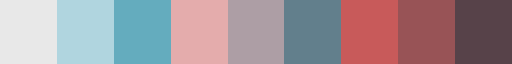

In [2376]:
# All colors to create a complete legend
all_colors = ['#e8e8e8', '#b0d5df', '#64acbe', '#e4acac', '#ad9ea5', '#627f8c', '#c85a5a', '#985356', '#574249']
cmap = matplotlib.colors.ListedColormap(all_colors)
cmap


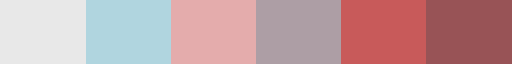

In [2377]:
# Set of colors matching the elements of Bi_Class
# We have to exclude those that did not come up in the data
colors = ['#e8e8e8', # 1A
          '#b0d5df', # 1B
          # '#64acbe', # 1C
          '#e4acac', # 2A
          '#ad9ea5', # 2B
          # '#627f8c', # 2C
          '#c85a5a', # 3A
          '#985356', # 3B
          # '#574249' # 3C 
]
            
cmap = matplotlib.colors.ListedColormap(colors)
cmap



In [2378]:
# fig, ax = plt.subplots(figsize=(24,18))

# # Adjust margins and set title
# ax.margins(x=0.05) 


# # Set the background color of the map
# ax.set(facecolor='white')

# # Turn axis off
# ax.axis('off')

# # Plot the map
# merge.plot(ax=ax,
#            column='Bi_Class',
#            cmap=cmap,
#            categorical = True,
#            legend = False)

# plt.tight_layout() # "tighten" two figures map and basemap
# plt.axis('off') # we don't need axis with coordinates
# ttl = ax.set_title('Total human and non-human influenza cases since 2020, globally',fontsize=28)
# ttl.set_position([0.25,1.05])


# # Step 2: draw the legend

# # We're drawing a 3x3 "box" as 3 columns
# # The xmin and xmax arguments axvspan are defined to create equally sized small boxes

# img2 = fig # refer to the main figure
# ax2 = fig.add_axes([-0.05, 0.25, 0.25, 0.125]) # add new axes to place the legend there
#                                          # and specify its location 
# alpha = 1 # alpha argument to make it more/less transperent

# # Column 1
# ax2.axvspan(xmin=0, xmax=0.33, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[0])
# ax2.axvspan(xmin=0, xmax=0.33, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[1])
# ax2.axvspan(xmin=0, xmax=0.33, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[2])

# # Column 2
# ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[3])
# ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[4])
# ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[5])

# # Column 3
# ax2.axvspan(xmin=0.66, xmax=1, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[6])
# ax2.axvspan(xmin=0.66, xmax=1, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[7])
# ax2.axvspan(xmin=0.66, xmax=1, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[8])

# # Step 3: annoate the legend
# ax2.tick_params(axis='both', which='both', length=0) # remove ticks from the big box
# ax2.axis('off'); # turn off its axis
# ax2.text(s='Human cases', x=0.1, y=-0.25) # annotate x axis
# ax2.text(s='Non-human cases', x=-0.25, y=0.1, rotation=90); # annotate y axis
# # ax2.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for x 
# # ax2.annotate("", xy=(1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for y 
# # plt.savefig('figures/bivariate_choropleth_2020.png', dpi=1200,facecolor='w', 
# #             edgecolor='w', 
# #             orientation='portrait',bbox_inches='tight')
# plt.tight_layout()
# plt.show()


In [2379]:
# fig, ax = plt.subplots(figsize=(24,18))

# # Adjust margins and set title
# ax.margins(x=0.05) 


# # Set the background color of the map
# ax.set(facecolor='white')

# # Turn axis off
# ax.axis('off')

# # Plot the map
# mergd.plot(ax=ax,
#            column='Bi_Class',
#            cmap=cmap,
#            categorical = True,
#            legend = False)

# plt.tight_layout() # "tighten" two figures map and basemap
# plt.axis('off') # we don't need axis with coordinates
# ttl = ax.set_title('Total human and non-human influenza cases, globally',fontsize=28)
# ttl.set_position([0.25,1.05])


# # Step 2: draw the legend

# # We're drawing a 3x3 "box" as 3 columns
# # The xmin and xmax arguments axvspan are defined to create equally sized small boxes

# img2 = fig # refer to the main figure
# ax2 = fig.add_axes([-0.05, 0.25, 0.25, 0.125]) # add new axes to place the legend there
#                                          # and specify its location 
# alpha = 1 # alpha argument to make it more/less transperent

# # Column 1
# ax2.axvspan(xmin=0, xmax=0.33, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[0])
# ax2.axvspan(xmin=0, xmax=0.33, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[1])
# ax2.axvspan(xmin=0, xmax=0.33, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[2])

# # Column 2
# ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[3])
# ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[4])
# ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[5])

# # Column 3
# ax2.axvspan(xmin=0.66, xmax=1, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[6])
# ax2.axvspan(xmin=0.66, xmax=1, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[7])
# ax2.axvspan(xmin=0.66, xmax=1, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[8])

# # Step 3: annoate the legend
# ax2.tick_params(axis='both', which='both', length=0) # remove ticks from the big box
# ax2.axis('off'); # turn off its axis
# ax2.text(s='Human cases', x=0.1, y=-0.25) # annotate x axis
# ax2.text(s='Non-human cases', x=-0.25, y=0.1, rotation=90); # annotate y axis
# # ax2.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for x 
# # ax2.annotate("", xy=(1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for y 
# # plt.savefig('figures/bivariate_choropleth_alltime.png', dpi=1200,facecolor='w', 
# #             edgecolor='w', 
# #             orientation='portrait',bbox_inches='tight')
# plt.show()


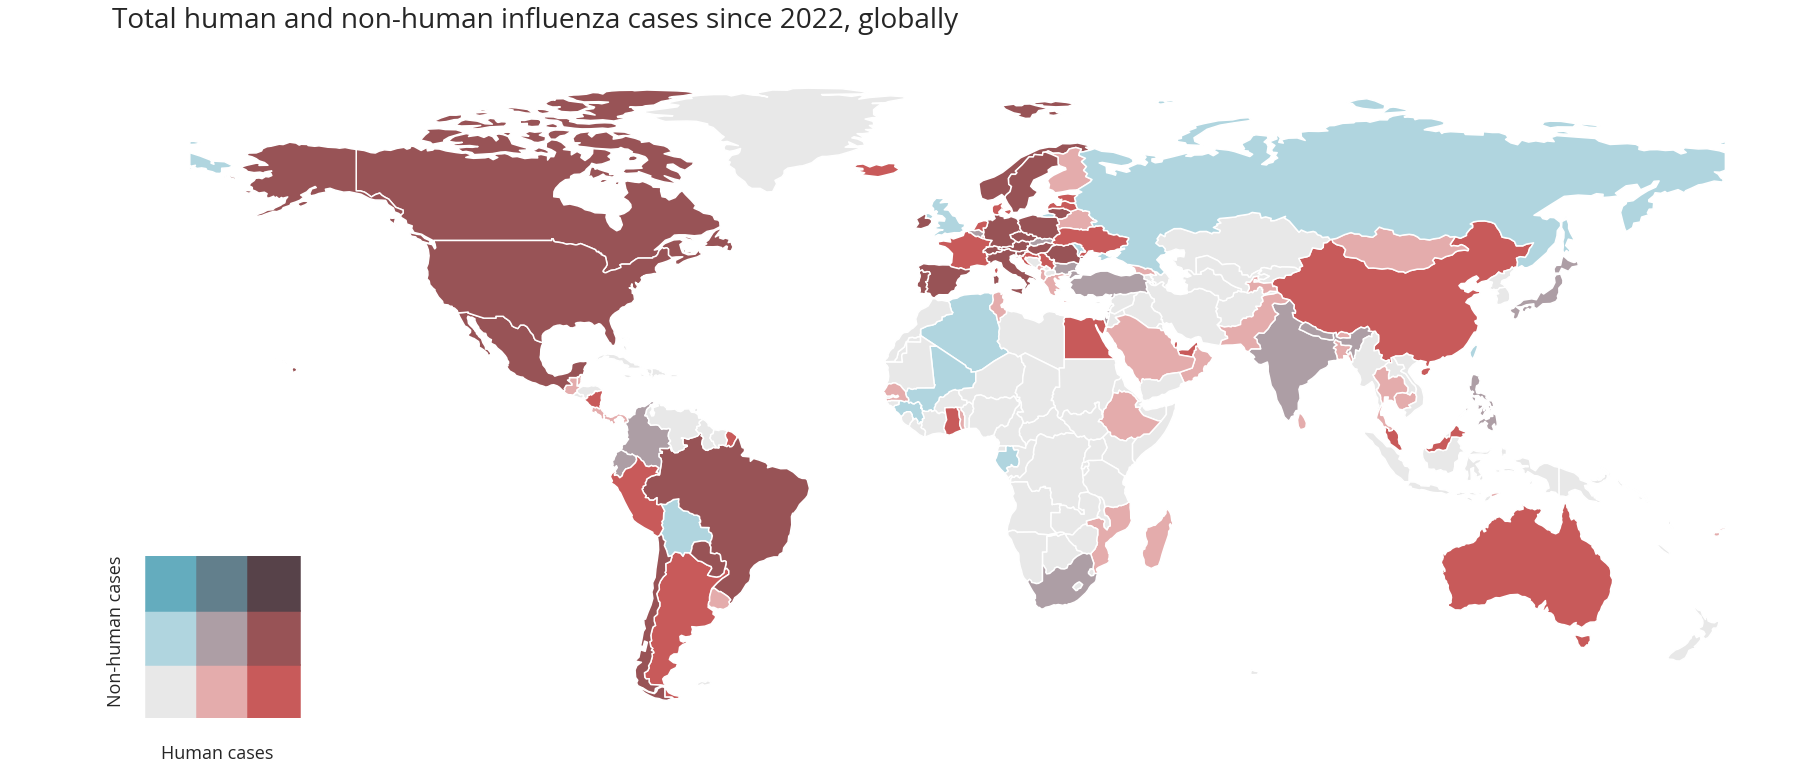

In [2382]:
fig, ax = plt.subplots(figsize=(24,18))

# Adjust margins and set title
ax.margins(x=0.05) 


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')

# Plot the map
fwss.plot(ax=ax,
           column='Bi_Class',
           cmap=cmap,
           categorical = True,
           legend = False)

plt.tight_layout() # "tighten" two figures map and basemap
plt.axis('off') # we don't need axis with coordinates
ttl = ax.set_title('Total human and non-human influenza cases since 2022, globally',fontsize=28)
ttl.set_position([0.25,1.05])


# Step 2: draw the legend

# We're drawing a 3x3 "box" as 3 columns
# The xmin and xmax arguments axvspan are defined to create equally sized small boxes

img2 = fig # refer to the main figure
ax2 = fig.add_axes([-0.05, 0.25, 0.25, 0.125]) # add new axes to place the legend there
                                         # and specify its location 
alpha = 1 # alpha argument to make it more/less transperent

# Column 1
ax2.axvspan(xmin=0, xmax=0.33, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[0])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[1])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[2])

# Column 2
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[3])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[4])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[5])

# Column 3
ax2.axvspan(xmin=0.66, xmax=1, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[6])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[7])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[8])

# Step 3: annoate the legend
ax2.tick_params(axis='both', which='both', length=0) # remove ticks from the big box
ax2.axis('off'); # turn off its axis
ax2.text(s='Human cases', x=0.1, y=-0.25) # annotate x axis
ax2.text(s='Non-human cases', x=-0.25, y=0.1, rotation=90); # annotate y axis
# ax2.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for x 
# ax2.annotate("", xy=(1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for y 
# plt.savefig('figures/bivariate_choropleth_2022.png', dpi=1200,facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')
plt.tight_layout()
plt.show()


In [1594]:
hp = pd.read_csv("data/host-path-interactions.csv")

In [1595]:
hp['hostSpecies']=hp['hostSpecies'].apply(remove_first_and_last_chars)
hp['pathogenSpecies']=hp['pathogenSpecies'].apply(remove_first_and_last_chars)


In [1596]:
# Define gradient color
gradient = ['#EEEFEF','#ACC253']

cm = LinearSegmentedColormap.from_list(
        "Custom", gradient, N=100)

In [1597]:
# Create a pivot table with hostSpecies as rows, pathogenSpecies as columns, and caseload as values
heatmap_data = hp.pivot_table(index='hostSpecies', columns='pathogenSpecies', values='caseload')
heatmap_data = heatmap_data.fillna(0)

In [1598]:
heatmap_data_normalized=(heatmap_data-heatmap_data.mean())/heatmap_data.std()

In [1605]:
# # Filter to show only the top N combinations with the highest caseloads
# top_n = 20
# heatmap_data = heatmap_data.apply(lambda x: x.nlargest(top_n), axis=1)
# heatmap_data = heatmap_data[heatmap_data.columns].nlargest(top_n, columns=heatmap_data.columns)
# heatmap_data = heatmap_data.fillna(0)

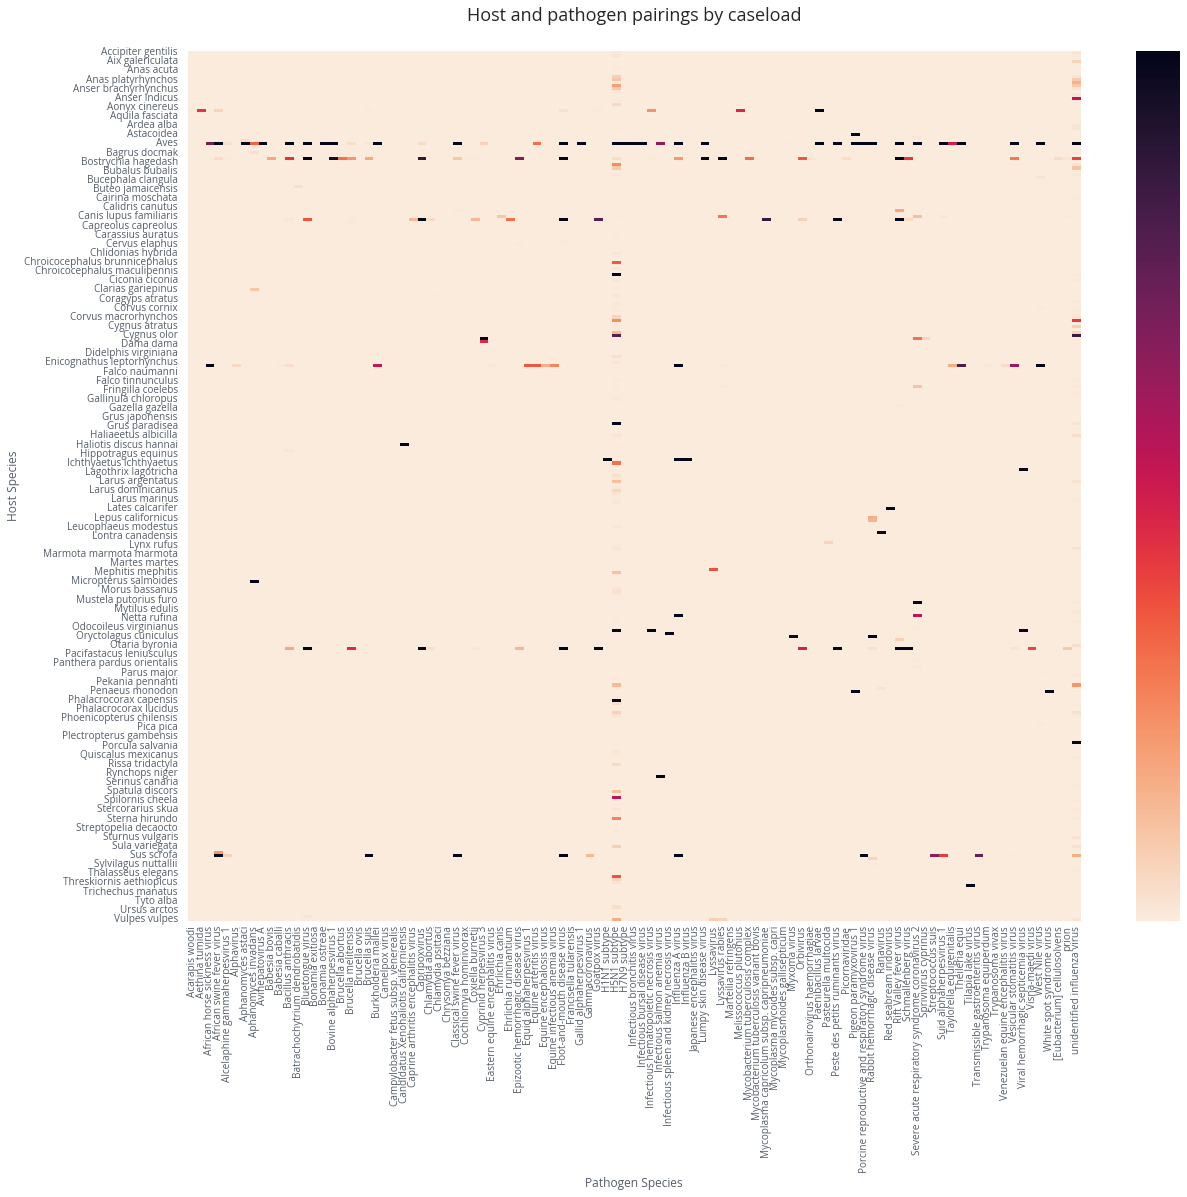

In [1643]:

# Set up the heatmap figure
fig, ax = plt.subplots(figsize=(20, 16))

vmin = 1
vmax = 1000

# Create the heatmap using seaborn with a diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
im = sns.heatmap(data=heatmap_data, cbar_kws={"ticks":[]}, cmap="rocket_r", annot=False, fmt='g', linewidths=0, ax=ax, vmin=vmin, vmax=vmax)

# Set tick labels and axis labels
ax.set_xlabel('Pathogen Species')
ax.set_ylabel('Host Species')
ax.set_title("Host and pathogen pairings by caseload")


# Set tick labels and axis labels
ax.tick_params(axis='x',pad=5,length=0,labelsize=10,width=30)
plt.setp(ax.get_xticklabels(), rotation=90)


ax.tick_params(axis='y',pad=10,width=30,labelsize=10)
ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

# Spines
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)

# # Set title and show the plot
# plt.tight_layout()
# plt.show()

plt.savefig('figures/heatmap_hostpath_alltime.png', dpi=1200,facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [1663]:
uq = pd.read_csv("data/uq-host-path-interactions.csv")

In [1664]:
uq['hostSpecies']=uq['hostSpecies'].apply(remove_first_and_last_chars)
uq['pathogenSpecies']=uq['pathogenSpecies'].apply(remove_first_and_last_chars)
uq['iso3']=uq['iso3'].apply(remove_first_and_last_chars)
uq['country']=uq['country'].apply(remove_first_and_last_chars)


In [1665]:
country_counts = uq.groupby('iso3').size().reset_index(name='count')

In [1686]:
country_counts= country_counts.sort_values(by="count")

In [1687]:
country_counts.tail(10)

,iso3,count
14,BGR,49
27,CHL,54
110,NLD,54
118,PHL,60
75,JPN,63
72,ITA,95
13,BGD,97
53,GBR,118
156,ZAF,142
153,USA,157


In [1667]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"iso3"})
cols = ['name','iso3','geometry']
world = world[cols]
world = world.sort_values(by="iso3")

In [1668]:
# Fix issues in geopandas
world.loc[world['name'] == 'France', 'iso3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso3'] = 'RKS'

In [1669]:
uq_hp = pd.merge(world,country_counts,on='iso3',how='outer')

In [1670]:
uq_hp = uq_hp[(uq_hp.name != "Antarctica")]

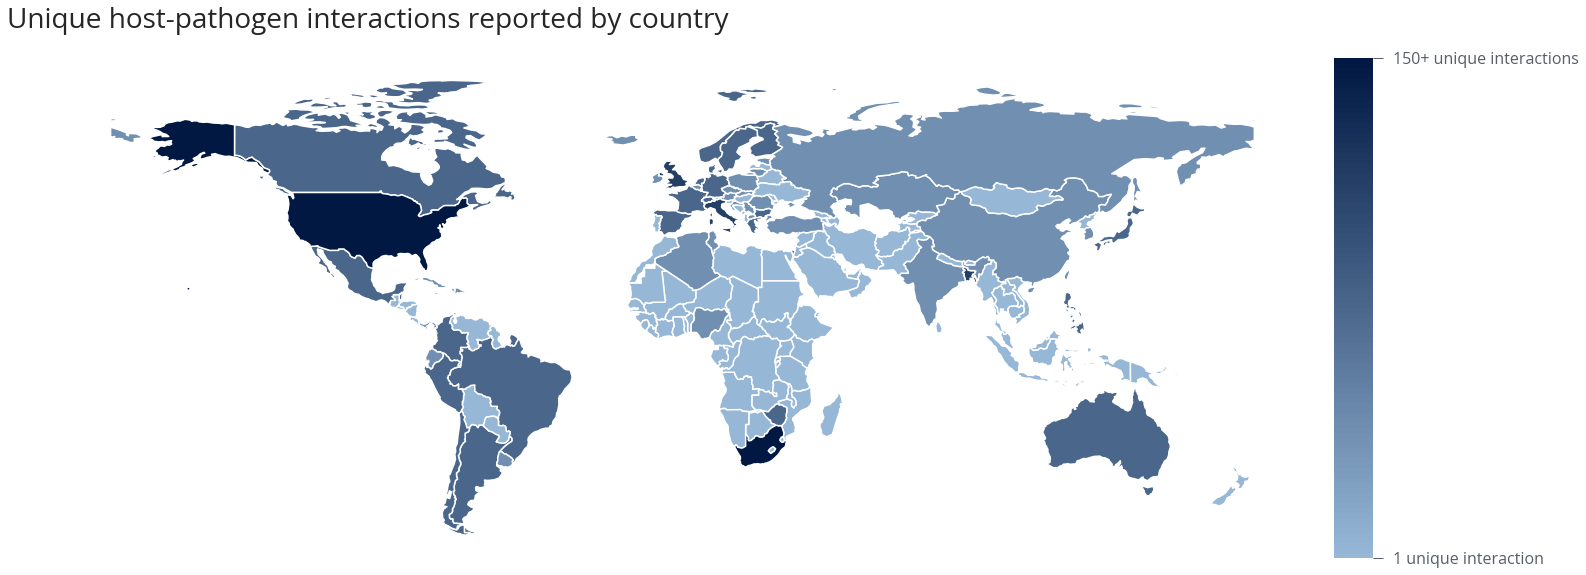

In [1685]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(24, 18))

vmin=0
vmax=150

# Plot the map
uq_hp.plot(column='count',
           cmap=cm,
           scheme='naturalbreaks',
           legend=False,
           ax=ax
          )

# Adjust margins and set title
ax.margins(x=0.05) 

ttl = ax.set_title('Unique host-pathogen interactions reported by country',fontsize=28)
ttl.set_position([0.25,1.05])


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cm,
                           norm=plt.Normalize(vmin=vmin,
                                              vmax=vmax))


sm._A = []
cbar = plt.colorbar(sm,cax=cax,drawedges=False)
cbar.set_ticks([vmin,vmax])
cbar.ax.yaxis.set_ticklabels(["1 unique interaction","150+ unique interactions"])
cbar.ax.yaxis.set_tick_params(direction='out',length=10,width=1,pad=10,colors=chart[1],labelsize=16)
cbar.outline.set_visible(False)

# # # Display the map
plt.tight_layout()
plt.show()

# # # Save
# plt.savefig('figures/global_host_path.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [1688]:
c = pd.read_csv("data/country_report_event.csv")

In [1689]:
c.head()

,country,iso3,reportCount,eventCount
0,"""Afghanistan""","""AFG""",10,17
1,"""Albania""","""ALB""",21,35
2,"""Algeria""","""DZA""",105,209
3,"""Angola""","""AGO""",12,4
4,"""Argentina""","""ARG""",677,768


In [1691]:
c['iso3']=c['iso3'].apply(remove_first_and_last_chars)
c['country']=c['country'].apply(remove_first_and_last_chars)


In [1695]:
c= c.sort_values(by="eventCount")

In [1702]:
c.tail(10)

,country,iso3,reportCount,eventCount
62,Hungary,HUN,851,1909
51,France,FRA,329,2195
117,Philippines,PHL,1318,2725
159,Zimbabwe,ZWE,1056,2933
70,Italy,ITA,2166,3792
54,Germany,DEU,842,4106
118,Poland,POL,369,4284
10,Bangladesh,BGD,2663,4733
131,South Africa,ZAF,2819,6001
154,United States,USA,4613,7387


In [1697]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"iso3"})
cols = ['name','iso3','geometry']
world = world[cols]
world = world.sort_values(by="iso3")

In [1698]:
# Fix issues in geopandas
world.loc[world['name'] == 'France', 'iso3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso3'] = 'RKS'

In [1699]:
cre = pd.merge(world,c,on='iso3',how='outer')

In [1700]:
cre = cre[(cre.name != "Antarctica")]

In [1706]:
cre['reportCount'] = cre['reportCount'].fillna(0)

In [1707]:
cre['eventCount'] = cre['eventCount'].fillna(0)

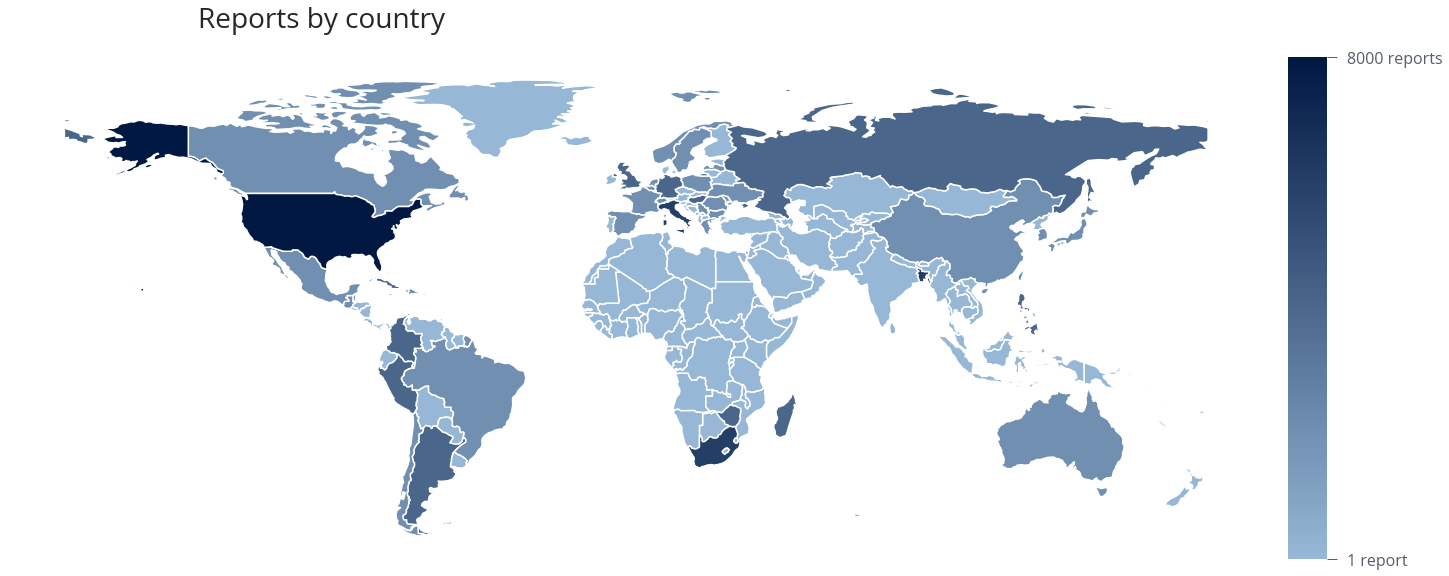

In [1709]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(24, 18))

# Plot the map
cre.plot(column='reportCount',
           cmap=cm,
           scheme='naturalbreaks',
           legend=False,
           ax=ax
          )

# Adjust margins and set title
ax.margins(x=0.05) 

ttl = ax.set_title('Reports by country',fontsize=28)
ttl.set_position([0.25,1.05])


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cm,
                           norm=plt.Normalize(vmin=vmin,
                                              vmax=vmax))


sm._A = []
cbar = plt.colorbar(sm,cax=cax,drawedges=False)
cbar.set_ticks([vmin,vmax])
cbar.ax.yaxis.set_ticklabels(["1 report","8000 reports"])
cbar.ax.yaxis.set_tick_params(direction='out',length=10,width=1,pad=10,colors=chart[1],labelsize=16)
cbar.outline.set_visible(False)

# # # Display the map
# plt.tight_layout()
# plt.show()

# # Save
# plt.savefig('figures/global_reports_alltime.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

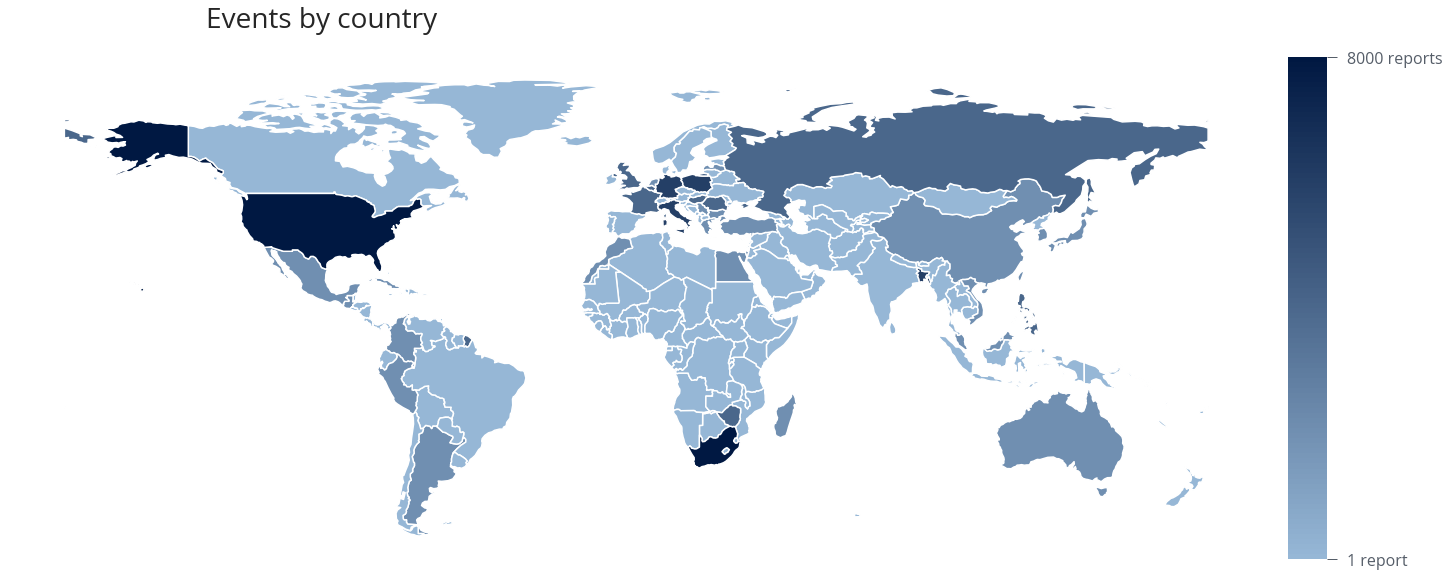

In [1711]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(24, 18))

# Plot the map
cre.plot(column='eventCount',
           cmap=cm,
           scheme='naturalbreaks',
           legend=False,
           ax=ax
          )

# Adjust margins and set title
ax.margins(x=0.05) 

ttl = ax.set_title('Events by country',fontsize=28)
ttl.set_position([0.25,1.05])


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cm,
                           norm=plt.Normalize(vmin=vmin,
                                              vmax=vmax))


sm._A = []
cbar = plt.colorbar(sm,cax=cax,drawedges=False)
cbar.set_ticks([vmin,vmax])
cbar.ax.yaxis.set_ticklabels(["1 report","8000 reports"])
cbar.ax.yaxis.set_tick_params(direction='out',length=10,width=1,pad=10,colors=chart[1],labelsize=16)
cbar.outline.set_visible(False)

# # # Display the map
plt.tight_layout()
plt.show()

# Save
# plt.savefig('figures/global_events_alltime.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [3083]:
def process_dataframe(df, year, datasource):
    df["iso3"] = df["iso3"].apply(remove_first_and_last_chars)
    df["species"] = df["species"].apply(remove_first_and_last_chars)
    df['flua'] = df['flua'].apply(remove_first_and_last_chars)
    df['date'] = df['date'].apply(remove_first_and_last_chars)
    df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
    df['year'] = df['date'].dt.year
    
    # Agg on country by year
    df = df.groupby(['iso3', 'year']).agg({'fluCases': 'sum'}).reset_index()
    df.rename(columns={'fluCases': datasource+'Cases'}, inplace=True)
    df = df.loc[df['year'] == year]
    
    return df

In [3094]:
pop = pd.read_csv("data/WPP2022_Demographic_Indicators_Medium.csv")
w = pd.read_csv("data/wahis_alltime_dates.csv")
f = pd.read_csv("data/flunet_alltime_dates.csv")

f = process_dataframe(f, 2019, "flunet")
w = process_dataframe(w, 2019, "wahis")

# Merge FluNet and WAHIS
merge = pd.merge(f, w,on=["iso3","year"])

# Merge that and Population
merge = pd.merge(left=pop,right=merge,left_on=['ISO3_code','Time'],right_on=['iso3','year'],how="outer")
merge= merge.sort_values(by=["ISO3_code","Time"])

keep = ['ISO3_code','Time','PopDensity',"MedianAgePop",'flunetCases',"wahisCases"]
df_keep = merge[keep]

df_keep['flunetCases'] = df_keep['flunetCases'].fillna(0)
df_keep['wahisCases'] = df_keep['wahisCases'].fillna(0)
df_keep['MedianAgePop'] = df_keep['MedianAgePop'].fillna(0)
df_keep['PopDensity'] = df_keep['PopDensity'].fillna(0)

# Drop rows where year is not the year you're targeting
df_keep = df_keep[df_keep['Time'] == 2019]

# Drop rows where iso3 code is NaN
df_keep = df_keep.dropna(subset=['ISO3_code'])

# Ratios
df_keep['totalCases'] = df_keep["flunetCases"] + df_keep["wahisCases"]
df_keep['humanToAnimalRatio'] = df_keep['flunetCases'] / df_keep['wahisCases']
df_keep['humanToAnimalRatio'] = df_keep['humanToAnimalRatio'].replace(np.inf,np.nan)
df_keep['humanToAnimalRatio'] = df_keep['humanToAnimalRatio'].fillna(0)

# Calculate the normalized values for 'MedianAgePop', and 'PopDensity'
df_keep['age_normalized'] = (df_keep['MedianAgePop'] - df_keep['MedianAgePop'].min()) / (df_keep['MedianAgePop'].max() - df_keep['MedianAgePop'].min())
df_keep['density_normalized'] = (df_keep['PopDensity'] - df_keep['PopDensity'].min()) / (df_keep['PopDensity'].max() - df_keep['PopDensity'].min())

In [3095]:
# Define the bins
bins = 3


# Update 'flu_bin' based on conditions using loc
df_keep.loc[df_keep['flunetCases'] >= 1000000, 'flu_bin'] = '[0.67, 1.0)'
df_keep.loc[(df_keep['flunetCases'] < 1000000) & (df_keep['flunetCases'] > 0), 'flu_bin'] = '[0.34, 0.66)'
df_keep.loc[df_keep['flunetCases'] == 0, 'flu_bin'] = '[-0.001, 0.33)'

# Ratio bins
df_keep.loc[df_keep['humanToAnimalRatio'] >= 1, 'ratio_bin'] = '[0.67,1.0)'
df_keep.loc[df_keep['humanToAnimalRatio'] < 1, 'ratio_bin'] = '[0.34,0.66)'
df_keep.loc[df_keep['humanToAnimalRatio'] == 0, 'ratio_bin'] = '[0.0,0.33)'

# Bin the second variable - y
df_keep['age_bin'] = pd.cut(df_keep['age_normalized'], bins=3,include_lowest=False)
df_keep['age_bin'] = df_keep['age_bin'].astype('str')

# Bin the second variable - y
df_keep['density_bin'] = pd.cut(df_keep['density_normalized'], bins=3,include_lowest=False)
df_keep['density_bin'] = df_keep['density_bin'].astype('str')

# Combine x and y codes to create Bi_Class
df_keep['FluDensity_Bi_Class'] = df_keep['flu_bin'].astype('str') + df_keep['density_bin'].astype('str')
df_keep['FluAge_Bi_Class'] = df_keep['flu_bin'].astype('str') + df_keep['age_bin'].astype('str')
df_keep['RatioAge_Bi_Class'] = df_keep['ratio_bin'].astype('str') + df_keep['age_bin'].astype('str')
df_keep['RatioDensity_Bi_Class'] = df_keep['ratio_bin'].astype('str') + df_keep['density_bin'].astype('str')

In [3096]:
print('Number of unique elements in Bi_Class =', len(df_keep['RatioAge_Bi_Class'].unique()))

print(sorted(df_keep["RatioAge_Bi_Class"].unique()))

Number of unique elements in Bi_Class = 4
['[0.0,0.33)(-0.001, 0.333]', '[0.0,0.33)(0.333, 0.667]', '[0.0,0.33)(0.667, 1.0]', '[0.34,0.66)(-0.001, 0.333]']


In [3087]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"ISO3_code"})
cols = ['name','ISO3_code','geometry']
world = world[cols]
world = world.sort_values(by="ISO3_code")

# Fix issues in geopandas
world.loc[world['name'] == 'France', 'ISO3_code'] = 'FRA'
world.loc[world['name'] == 'Norway', 'ISO3_code'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'ISO3_code'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'ISO3_code'] = 'RKS'

In [3088]:
df = pd.merge(world,df_keep,on='ISO3_code',how='outer')
df = df[(df.name != "Antarctica")]

In [3089]:
density = density.loc[(density['ISO3_code'] != "MCO") & (density['ISO3_code'] != "MAC")]

In [3090]:
age = df

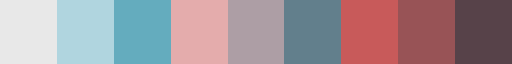

In [3078]:
# All colors to create a complete legend
all_colors = ['#e8e8e8', '#b0d5df', '#64acbe', '#e4acac', '#ad9ea5', '#627f8c', '#c85a5a', '#985356', '#574249']
cmap = matplotlib.colors.ListedColormap(all_colors)
cmap

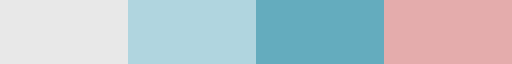

In [3097]:
# Set of colors matching the elements of Bi_Class
# We have to exclude those that did not come up in the data
colors = ['#e8e8e8', # 1A
          '#b0d5df', # 1B
          '#64acbe', # 1C
          '#e4acac', # 2A
          # '#ad9ea5', # 2B
          # '#627f8c', # 2C
          # '#c85a5a', # 3A
          # '#985356', # 3B
          # '#574249' # 3C 
]
            
cmap = matplotlib.colors.ListedColormap(colors)
cmap



In [3100]:
df['RatioAge_Bi_Class'].loc[df['ISO3_code'] == "ITA"]

84    [0.0,0.33)(0.667, 1.0]
Name: RatioAge_Bi_Class, dtype: object

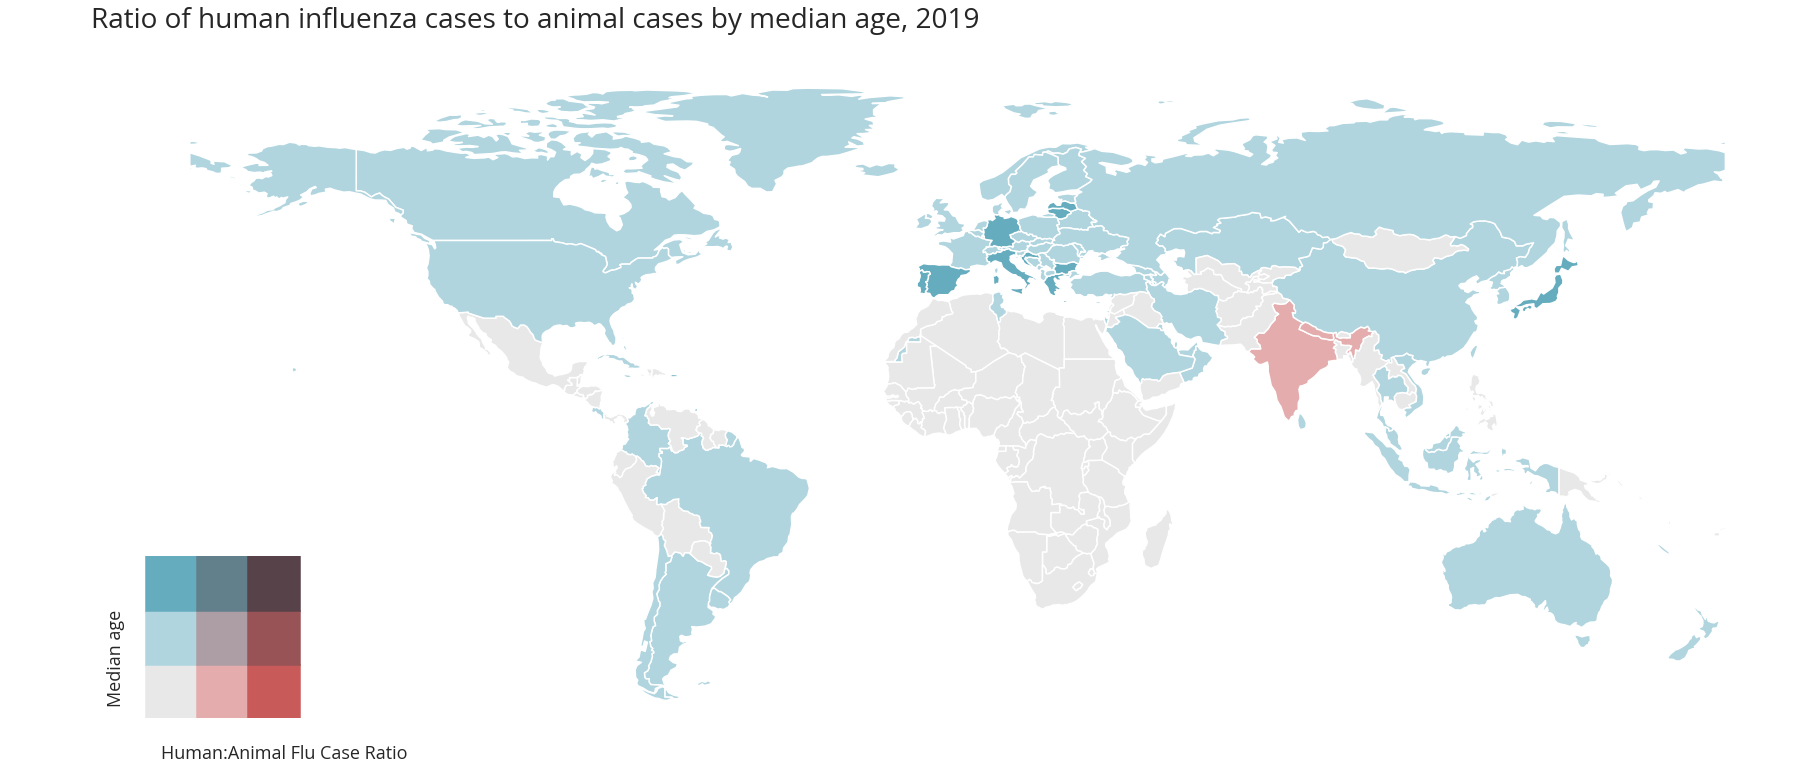

In [3101]:
fig, ax = plt.subplots(figsize=(24,18))

# Adjust margins and set title
ax.margins(x=0.05) 


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')
plt.tight_layout()

# Plot the map
df.plot(ax=ax,
           column='RatioAge_Bi_Class',
           cmap=cmap, 
           categorical = True,
           legend = False)

plt.axis('off') # we don't need axis with coordinates
ttl = ax.set_title('Ratio of human influenza cases to animal cases by median age, 2019',fontsize=28)
ttl.set_position([0.25,1.05])


# Step 2: draw the legend

# We're drawing a 3x3 "box" as 3 columns
# The xmin and xmax arguments axvspan are defined to create equally sized small boxes

img2 = fig # refer to the main figure
ax2 = fig.add_axes([-0.05, 0.25, 0.25, 0.125]) # add new axes to place the legend there
                                         # and specify its location 
alpha = 1 # alpha argument to make it more/less transperent

# Column 1
ax2.axvspan(xmin=0, xmax=0.33, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[0])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[1])
ax2.axvspan(xmin=0, xmax=0.33, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[2])

# Column 2
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[3])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[4])
ax2.axvspan(xmin=0.33, xmax=0.66, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[5])

# Column 3
ax2.axvspan(xmin=0.66, xmax=1, ymin=0, ymax=0.33, alpha=alpha, color=all_colors[6])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.33, ymax=0.66, alpha=alpha, color=all_colors[7])
ax2.axvspan(xmin=0.66, xmax=1, ymin=0.66, ymax=1, alpha=alpha, color=all_colors[8])

# Step 3: annoate the legend
ax2.tick_params(axis='both', which='both', length=0) # remove ticks from the big box
ax2.axis('off'); # turn off its axis
ax2.text(s='Human:Animal Flu Case Ratio', x=0.1, y=-0.25) # annotate x axis
ax2.text(s='Median age', x=-0.25, y=0.1, rotation=90); # annotate y axis
# ax2.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for x 
# ax2.annotate("", xy=(1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", lw=2,color=chart[1])) # draw arrow for y 
plt.savefig('figures/ratio_and_age_2019.png', dpi=1200,facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')
# plt.show()


In [3105]:
# Plot the number of cases normalized by population, over time
# Cases on y-axis
# Year on x-axis

reg= pd.read_csv("data/continental_cases_human.csv")
pop = pd.read_csv("data/WPP2022_Demographic_Indicators_Medium.csv")

In [3110]:
pop = pop.loc[pop['LocTypeID']==2]

In [3115]:
pop["Location"].unique()

array(['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
       'Northern America', 'Oceania'], dtype=object)

In [3103]:
reg['geo']=reg['geo'].apply(remove_first_and_last_chars)


,geo,yearMonth,fluCases
0,"""Asia""","""2022-12""",266
1,"""Europe""","""2022-12""",871
2,"""Africa""","""2022-12""",23
3,"""South America""","""2022-12""",11
4,"""Asia""","""2022-11""",730


In [3116]:
reg["geo"].unique()

array(['"Asia"', '"Europe"', '"Africa"', '"South America"', '"Oceania"'],
      dtype=object)